In [1]:
import pandas as pd

print("hello")

hello


Praxiswoche. 28.08.-01.09.
Bearbeite mindestens eins der drei Projekte (Projekt_1 oder Projekt_2 oder Projekt_3 für eine Herausforderung). Analysiere die Datensätze und finde interessante Informationen aus ihnen heraus. Es sind hier bei alle (!) bisher kennengelernten Module erlaubt - von "einfachen Darstellungen" bis hin zu animierten Grafiken kann und sollte also alles erstellt werden.

Erstelle anschließend eine Präsentation über deine Ergebnisse, die du am Ende des Praxisprojekts präsentierst.
Falls du noch Zeit übrig hast, erstelle außerdem mit Hilfe von Python ein Handout deines Vortrags in Form einer PDF, mit deinen Diagrammen und den wichtigsten Informationen zusammengefasst. Die Präsentation der Ergebnisse sollte ca. 10 Minuten lang sein!



#Projekt 1 besteht aus drei Datensätzen (...Datensatz_Glueck...)

Globales Glück
Gegeben ist ein Datensatz über die Glücklichkeit der Bewohner von 156 Ländern der Welt,
zusammen mit weiteren vermeintlichen Einflussfaktoren in den Jahren 2018 und 2019.
Overall rank: Rangfolge der Länder nach Glücklichkeit
Country or region: Ländernamen
Score: Glücklichkeitswert
GDP per capita: BIP pro Kopf
Social support: Stärke der Sozialleistungen
Healthy life expectancy: Wert über die Lebenserwartung
Freedom to make life choices: Wert über die Möglichkeit der freien Entfaltung
Generosity: Wert über die Großzügigkeit
Perceptions of corruption: Die Bewertung der Korruptionswahrnehmung in
verschiedenen Ländern.
Analysiere den Datensatz unter Einsatz visueller Mittel und finde heraus, welchen Einfluss die
einzelnen Faktoren auf die Glücklichkeit der Bewohner haben. Finde außerdem heraus, ob es
einen Zusammenhang zwischen verschiedenen Faktoren gibt

Um den Einfluss der verschiedenen Faktoren auf die Glücklichkeit der Bewohner zu analysieren und Zusammenhänge zwischen den Faktoren zu finden, habe ich verschiedene statistische Methoden und visuelle Darstellungen verwendet.

Hier sind einige Schritte:

1. **Korrelationsanalyse:**  die Korrelationen zwischen den verschiedenen Faktoren und der Glücklichkeitswert zu berechnen. Die Korrelationskoeffizienten zeigen an, wie stark die Variablen miteinander zusammenhängen.

2. **Streudiagramme:** Streudiagramme, um den Zusammenhang zwischen den einzelnen Faktoren und der Glücklichkeitsbewertung zu visualisieren. Auf der x-Achse kannst du beispielsweise den BIP pro Kopf (GDP per capita) platzieren und auf der y-Achse den Glücklichkeitswert (Score).

3. **Korrelationsmatrix:** eine Korrelationsmatrix, die alle Korrelationskoeffizienten zwischen den Faktoren enthält. Dies ermöglicht es dir, mehrere Zusammenhänge auf einmal zu betrachten.

4. **Heatmap:** eine Heatmap, um die Korrelationskoeffizienten visuell darzustellen. Farbliche Abstufungen können anzeigen, welche Faktoren stark miteinander korrelieren und welche weniger.

5. **Regressionsanalyse:** lineare Regressionsanalyse durch, um den Einfluss mehrerer Faktoren gleichzeitig auf die Glücklichkeitsbewertung zu untersuchen. So kannst du sehen, wie stark jeder Faktor individuell zur Vorhersage der Glücklichkeit beiträgt.

6. **Boxplots oder Balkendiagramme:** Boxplots oder Balkendiagramme, um die Verteilung der verschiedenen Faktoren in Bezug auf die Glücklichkeitsrangfolge zu visualisieren.



# Importieren das benötigten Module

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import statsmodels.formula.api as smf

# Importieren den Datensatz 20230828_3.3_Datensatz_Glueck_2018.csv

In [2]:
glueck_2018=pd.read_csv('20230828_3.3_Datensatz_Glueck_2018.csv')
glueck_2018


Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.632           1.305   
1               2                    Norway  7.594           1.456   
2               3                   Denmark  7.555           1.351   
3               4                   Iceland  7.495           1.343   
4               5               Switzerland  7.487           1.420   
..            ...                       ...    ...             ...   
151           152                     Yemen  3.355           0.442   
152           153                  Tanzania  3.303           0.455   
153           154               South Sudan  3.254           0.337   
154           155  Central African Republic  3.083           0.024   
155           156                   Burundi  2.905           0.091   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.592                    0.874                         0.681   
1             1.582                    0.861                         0.686   
2             1.590                    0.868                         0.683   
3             1.644                    0.914                         0.677   
4             1.549                    0.927                         0.660   
..              ...                      ...                           ...   
151           1.073                    0.343                         0.244   
152           0.991                    0.381                         0.481   
153           0.608                    0.177                         0.112   
154           0.000                    0.010                         0.305   
155           0.627                    0.145                         0.065   

     Generosity  Perceptions of corruption  
0         0.202                      0.393  
1         0.286                      0.340  
2         0.284                      0.408  
3         0.353                      0.138  
4         0.256                      0.357  
..          ...                        ...  
151       0.083                      0.064  
152       0.270                      0.097  
153       0.224                      0.106  
154       0.218                      0.038  
155       0.149                      0.076  

[156 rows x 9 columns]

# Überprüfung auf felhlende Date

In [110]:
glueck_2018.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [3]:
glueck_2018.shape

(156, 9)

# Rangfolge der Länder nach Glücklichkeit - Die ersten 10 und die letzten 10 Länder im Jahr 2018

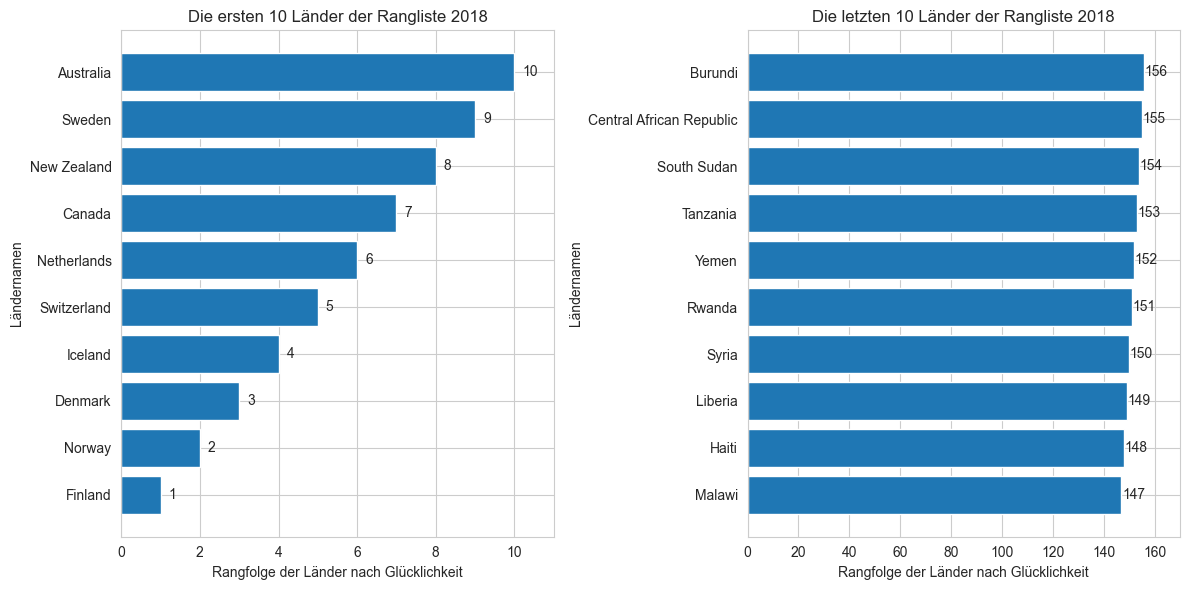

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

# Lesen den Datensatz
glueck_2018 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2018.csv')

# Sortieren des Datensatz nach 'Overall rank'- Rangfolge der Länder nach Glücklichkeit
sorted_glueck = glueck_2018.sort_values(by='Overall rank')

#  Selektieren die ersten 10 Länder der Rangliste
first_10 = sorted_glueck.head(10)

# Selektieren die 10 letztpazierten Länder
last_10 = sorted_glueck.tail(10)

# Balkendiagramm für die ersten 10 Länder der Rangliste
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(first_10['Country or region'], first_10['Overall rank'])
plt.title('Die ersten 10 Länder der Rangliste 2018')
plt.xlabel('Rangfolge der Länder nach Glücklichkeit')
plt.ylabel('Ländernamen')
plt.xlim(0, 11)

# Beschriften den oberen Teil der Balken mit Ranglistennummern
for index, value in enumerate(first_10['Overall rank']):
    plt.text(value + 0.2, index, str(value), va='center')

# Speichern das erste Balkediagramm als "png"
plt.savefig('first_10_ranking.png', dpi=300, bbox_inches='tight')

# Balkendiagramm für die 10 letztplazierten Ländern
plt.subplot(1, 2, 2)
plt.barh(last_10['Country or region'], last_10['Overall rank'])
plt.title('Die letzten 10 Länder der Rangliste 2018')
plt.xlabel('Rangfolge der Länder nach Glücklichkeit')
plt.ylabel('Ländernamen')
plt.xlim(0, 170)

# Beschriften den oberen Teil der Balke mit Ranglistennummern
for index, value in enumerate(last_10['Overall rank']):
    plt.text(value + 0.2, index, str(value), va='center')

# Speichern das zwieite  Balkendiagramm als "png"
plt.savefig('last_10_ranking.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()



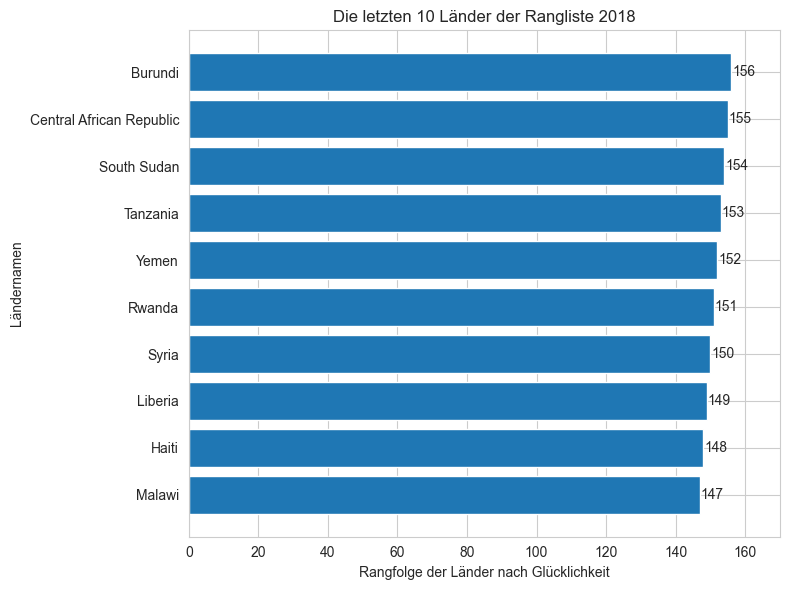

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Landen des Datensatzes 2018
glueck_2018 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2018.csv')

# Sortieren des Datensatzes nach 'Overall rank'
sorted_glueck = glueck_2018.sort_values(by='Overall rank')

# Sortieren die letzten 10 Länder der Rangliste
last_10 = sorted_glueck.tail(10)


plt.barh(last_10['Country or region'], last_10['Overall rank'])
plt.title('Die letzten 10 Länder der Rangliste 2018')
plt.xlabel('Rangfolge der Länder nach Glücklichkeit')
plt.ylabel('Ländernamen')
plt.xlim(0, 170)


for index, value in enumerate(last_10['Overall rank']):
    plt.text(value + 0.2, index, str(value), va='center')

plt.savefig('last_10_ranking2018.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [79]:
# Laden des Datensatzes 20230828_3.3_Datensatz_Glueck_2019.csv

glueck_2019=pd.read_csv('20230828_3.3_Datensatz_Glueck_2019.csv')
glueck_2019

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1             1.573                    0.996                         0.592   
2             1.582                    1.028                         0.603   
3             1.624                    1.026                         0.591   
4             1.522                    0.999                         0.557   
..              ...                      ...                           ...   
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  
0         0.153                      0.393  
1         0.252                      0.410  
2         0.271                      0.341  
3         0.354                      0.118  
4         0.322                      0.298  
..          ...                        ...  
151       0.217                      0.411  
152       0.276                      0.147  
153       0.158                      0.025  
154       0.235                      0.035  
155       0.202                      0.091  

[156 rows x 9 columns]

# Überprüfungen auf fehlende Date

In [111]:
glueck_2019.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

# Rangfolge der Länder nach Glücklichkeit - Die ersten 10 und die letzten 10 Länder im Jahr 2019

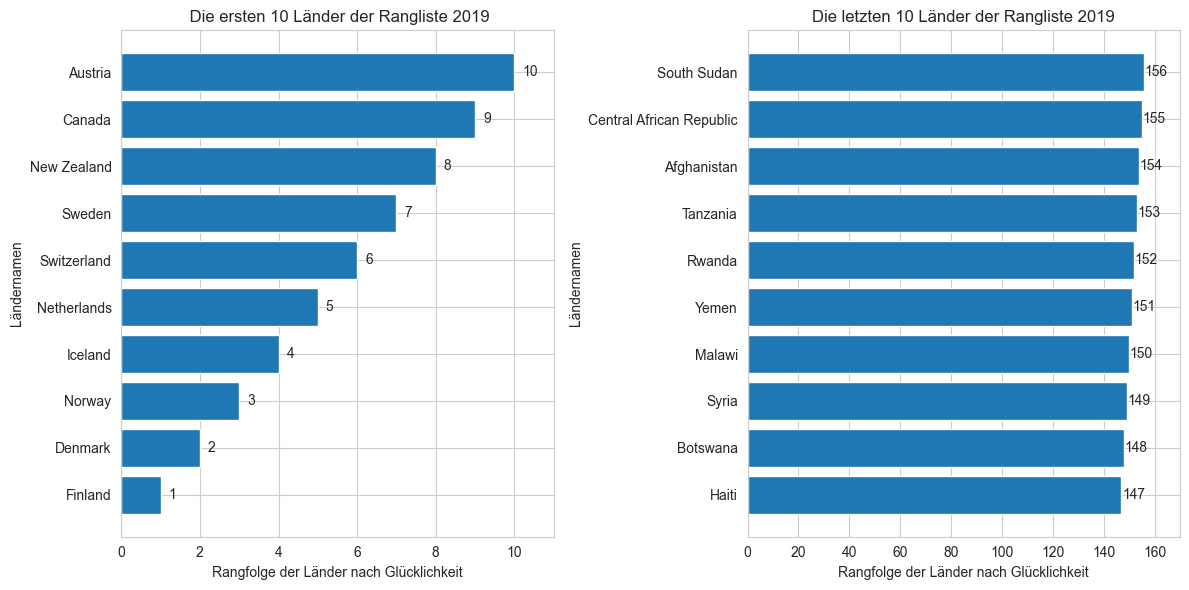

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
glueck_2019 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2019.csv')

# Sort the dataset by 'Overall rank'
sorted_glueck = glueck_2019.sort_values(by='Overall rank')

# Select the first 10 ranking countries
first_10 = sorted_glueck.head(10)

# Select the last 10 ranking countries
last_10 = sorted_glueck.tail(10)

# Create bar plots for first 10 and last 10 ranking countries
plt.figure(figsize=(12, 6))

# Bar plot for first 10 ranking countries
plt.subplot(1, 2, 1)
plt.barh(first_10['Country or region'], first_10['Overall rank'])
plt.title(' Die ersten 10 Länder der Rangliste 2019')
plt.xlabel('Rangfolge der Länder nach Glücklichkeit')
plt.ylabel('Ländernamen')

plt.xlim(0,11)
# Annotate the top of the bars with ranking numbers
for index, value in enumerate(first_10['Overall rank']):
    plt.text(value + 0.2, index, str(value), va='center')
plt.savefig('first_10_ranking2019.png', dpi=300, bbox_inches='tight')

# Bar plot for last 10 ranking countries
plt.subplot(1, 2, 2)
plt.barh(last_10['Country or region'], last_10['Overall rank'])
plt.title('Die letzten 10 Länder der Rangliste 2019')
plt.xlabel('Rangfolge der Länder nach Glücklichkeit')
plt.ylabel('Ländernamen')
plt.xlim(0,170)
plt.savefig('last_10_ranking2019.png',dpi=300,bbox_inches='tight')
# Annotate the top of the bars with ranking numbers
for index, value in enumerate(last_10['Overall rank']):
    plt.text(value + 0.2, index, str(value), va='center')

plt.tight_layout()
plt.show()


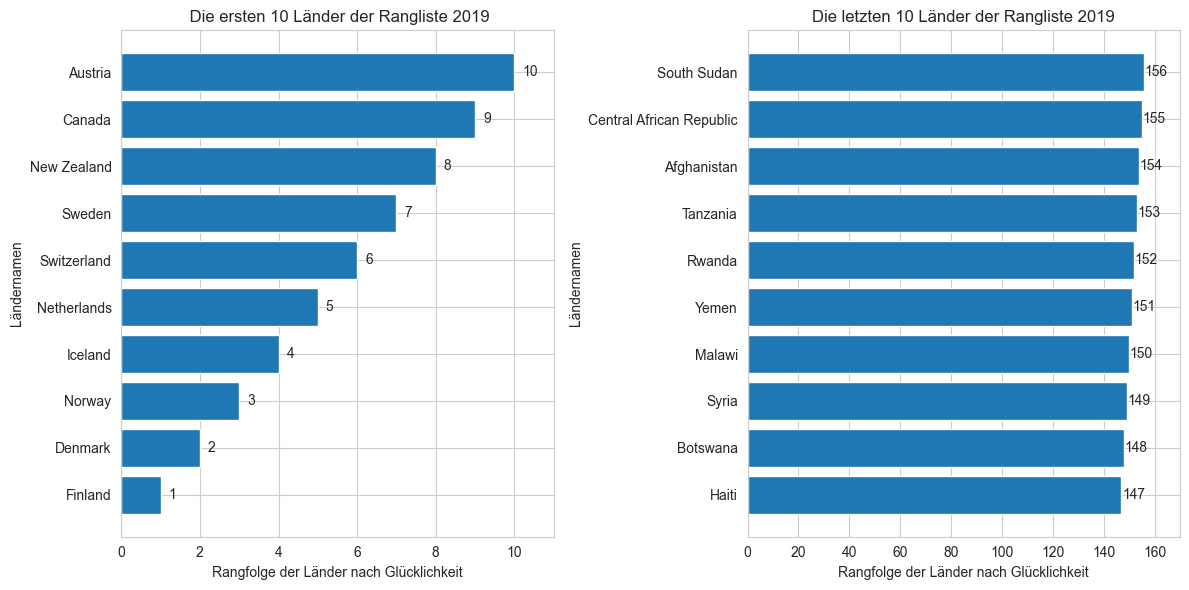

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
glueck_2019 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2019.csv')

# Sort the dataset by 'Overall rank'
sorted_glueck = glueck_2019.sort_values(by='Overall rank')

# Select the first 10 ranking countries
first_10 = sorted_glueck.head(10)

# Select the last 10 ranking countries
last_10 = sorted_glueck.tail(10)

# Create bar plots for first 10 and last 10 ranking countries
plt.figure(figsize=(12, 6))

# Bar plot for first 10 ranking countries
plt.subplot(1, 2, 1)
plt.barh(first_10['Country or region'], first_10['Overall rank'])
plt.title(' Die ersten 10 Länder der Rangliste 2019')
plt.xlabel('Rangfolge der Länder nach Glücklichkeit')
plt.ylabel('Ländernamen')
plt.xlim(0, 11)

# Annotate the top of the bars with ranking numbers
for index, value in enumerate(first_10['Overall rank']):
    plt.text(value + 0.2, index, str(value), va='center')
plt.savefig('first_10_ranking2019.png', dpi=300, bbox_inches='tight')

# Save the first plot as 'first_10_ranking2019.png'

# Bar plot for last 10 ranking countries
plt.subplot(1, 2, 2)
plt.barh(last_10['Country or region'], last_10['Overall rank'])
plt.title('Die letzten 10 Länder der Rangliste 2019')
plt.xlabel('Rangfolge der Länder nach Glücklichkeit')
plt.ylabel('Ländernamen')
plt.xlim(0, 170)


for index, value in enumerate(last_10['Overall rank']):
    plt.text(value + 0.2, index, str(value), va='center')


plt.savefig('last_10_ranking2019.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


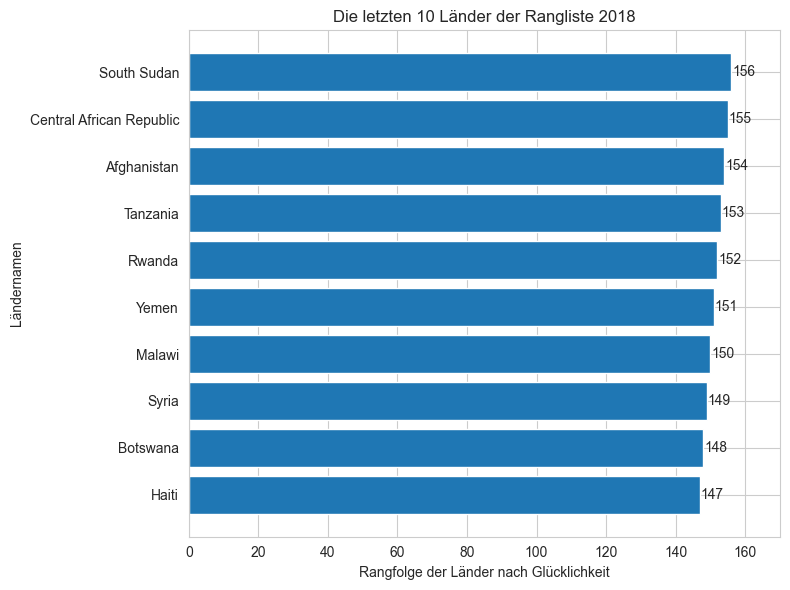

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
glueck_2019 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2019.csv')

# Sort the dataset by 'Overall rank'
sorted_glueck = glueck_2019.sort_values(by='Overall rank')

# Select the last 10 ranking countries
last_10 = sorted_glueck.tail(10)

# Create a bar plot for the last 10 ranking countries
plt.figure(figsize=(8, 6))
plt.barh(last_10['Country or region'], last_10['Overall rank'])
plt.title('Die letzten 10 Länder der Rangliste 2018')
plt.xlabel('Rangfolge der Länder nach Glücklichkeit')
plt.ylabel('Ländernamen')
plt.xlim(0, 170)

# Annotate the top of the bars with ranking numbers
for index, value in enumerate(last_10['Overall rank']):
    plt.text(value + 0.2, index, str(value), va='center')

# Save the plot as 'last_10_ranking2019.png'
plt.savefig('last_10_ranking2018.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [14]:
# Read the dataset  20230828_3.3_Datensatz_Glueck_2018-2019.csv

glueck_2018_2019=pd.read_csv('20230828_3.3_Datensatz_Glueck_2018-2019.csv')
glueck_2018_2019

Overall rank Country or region  Year  Score  GDP per capita  \
0             154       Afghanistan  2019  3.203           0.350   
1             145       Afghanistan  2018  3.632           0.332   
2             107           Albania  2019  4.719           0.947   
3             112           Albania  2018  4.586           0.916   
4              88           Algeria  2019  5.211           1.002   
..            ...               ...   ...    ...             ...   
307           152             Yemen  2018  3.355           0.442   
308           138            Zambia  2019  4.107           0.578   
309           125            Zambia  2018  4.377           0.562   
310           146          Zimbabwe  2019  3.663           0.366   
311           144          Zimbabwe  2018  3.692           0.357   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             0.517                    0.361                         0.000   
1             0.537                    0.255                         0.085   
2             0.848                    0.874                         0.383   
3             0.817                    0.790                         0.419   
4             1.160                    0.785                         0.086   
..              ...                      ...                           ...   
307           1.073                    0.343                         0.244   
308           1.058                    0.426                         0.431   
309           1.047                    0.295                         0.503   
310           1.114                    0.433                         0.361   
311           1.094                    0.248                         0.406   

     Generosity  Perceptions of corruption  
0         0.158                      0.025  
1         0.191                      0.036  
2         0.178                      0.027  
3         0.149                      0.032  
4         0.073                      0.114  
..          ...                        ...  
307       0.083                      0.064  
308       0.247                      0.087  
309       0.221                      0.082  
310       0.151                      0.089  
311       0.132                      0.099  

[312 rows x 10 columns]

In [ ]:
glueck_2019

#  Vergleichen die Spalte "Country or region" aus den beiden Datenrahmen 2018 und 2019

In [19]:
glueck_2018['Country or region'].equals(glueck_2019['Country or region'])

False

In [23]:
glueck_2018= pd.read_csv('20230828_3.3_Datensatz_Glueck_2018.csv')

# Rename the column 'GDP per capita' to 'GDP_per_capita'
glueck_2018.rename(columns={'Country or region': 'Country_or_region'}, inplace=True)
glueck_2018

Overall rank         Country_or_region  Score  GDP per capita  \
0               1                   Finland  7.632           1.305   
1               2                    Norway  7.594           1.456   
2               3                   Denmark  7.555           1.351   
3               4                   Iceland  7.495           1.343   
4               5               Switzerland  7.487           1.420   
..            ...                       ...    ...             ...   
151           152                     Yemen  3.355           0.442   
152           153                  Tanzania  3.303           0.455   
153           154               South Sudan  3.254           0.337   
154           155  Central African Republic  3.083           0.024   
155           156                   Burundi  2.905           0.091   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.592                    0.874                         0.681   
1             1.582                    0.861                         0.686   
2             1.590                    0.868                         0.683   
3             1.644                    0.914                         0.677   
4             1.549                    0.927                         0.660   
..              ...                      ...                           ...   
151           1.073                    0.343                         0.244   
152           0.991                    0.381                         0.481   
153           0.608                    0.177                         0.112   
154           0.000                    0.010                         0.305   
155           0.627                    0.145                         0.065   

     Generosity  Perceptions of corruption  
0         0.202                      0.393  
1         0.286                      0.340  
2         0.284                      0.408  
3         0.353                      0.138  
4         0.256                      0.357  
..          ...                        ...  
151       0.083                      0.064  
152       0.270                      0.097  
153       0.224                      0.106  
154       0.218                      0.038  
155       0.149                      0.076  

[156 rows x 9 columns]

In [18]:
glueck_2019= pd.read_csv('20230828_3.3_Datensatz_Glueck_2019.csv')

# Rename the column 'GDP per capita' to 'GDP_per_capita'
#glueck_2019.rename(columns={'Country or region': 'Country_or_region'}, inplace=True)
glueck_2019

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1             1.573                    0.996                         0.592   
2             1.582                    1.028                         0.603   
3             1.624                    1.026                         0.591   
4             1.522                    0.999                         0.557   
..              ...                      ...                           ...   
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  
0         0.153                      0.393  
1         0.252                      0.410  
2         0.271                      0.341  
3         0.354                      0.118  
4         0.322                      0.298  
..          ...                        ...  
151       0.217                      0.411  
152       0.276                      0.147  
153       0.158                      0.025  
154       0.235                      0.035  
155       0.202                      0.091  

[156 rows x 9 columns]

# Überprüfung der Datenbank auf fehlende Werte

In [19]:
#not_in=glueck_2018.loc[~glueck_2018.Country_or_region.isin(glueck_2019.Country_or_region)].unique

import pandas as pd



# Get unique values in 'Country_or_region' column of glueck_2018 that are not in glueck_2019
not_in = glueck_2018.loc[~glueck_2018['Country or region'].isin(glueck_2019['Country or region']), 'Country or region'].unique()

# Print the unique values
print(not_in)


['Belize' 'Macedonia' 'Sudan' 'Angola']


In [20]:
# Get unique values in 'Country_or_region' column of glueck_2019 that are not in glueck_2018
not_in_2019 = glueck_2019.loc[~glueck_2019['Country or region'].isin(glueck_2018['Country or region']), 'Country or region'].unique()

# Print the unique values
print(not_in_2019)


['North Macedonia' 'Gambia' 'Swaziland' 'Comoros']


In [21]:
unique_values_ländern=glueck_2018_2019['Country or region'].unique()
print("Unique values in column :",unique_values_ländern)

Unique values in column : ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Ethiopia'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Haiti' 'Honduras' 'Hong Kong' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Ivory Coast' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo'
 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 'Libya' 'Lithuania' 'Luxembourg' 'Macedonia' 'Madagascar' 'Malawi'
 'Malaysia' 

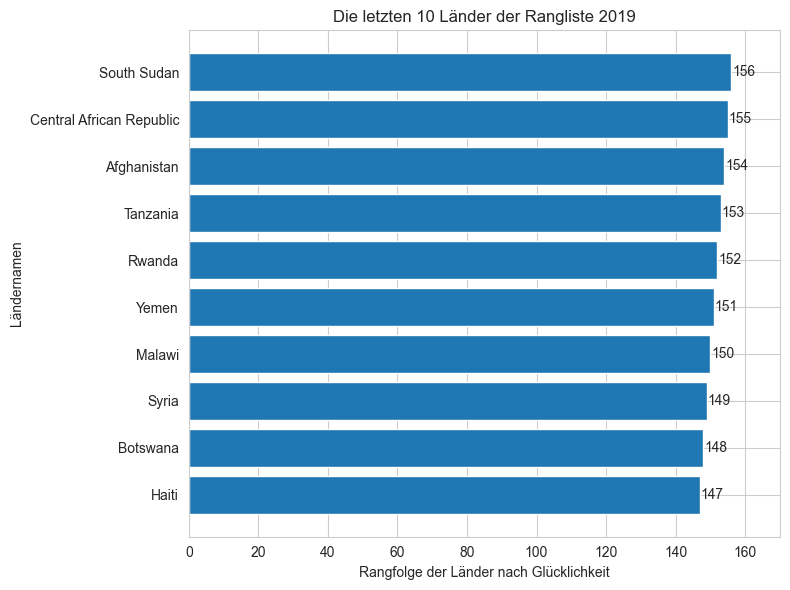

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
glueck_2019 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2019.csv')

# Sort the dataset by 'Overall rank'
sorted_glueck = glueck_2019.sort_values(by='Overall rank')

# Select the last 10 ranking countries
last_10 = sorted_glueck.tail(10)

# Create a bar plot for the last 10 ranking countries
plt.figure(figsize=(8, 6))
plt.barh(last_10['Country or region'], last_10['Overall rank'])
plt.title('Die letzten 10 Länder der Rangliste 2019')
plt.xlabel('Rangfolge der Länder nach Glücklichkeit')
plt.ylabel('Ländernamen')
plt.xlim(0, 170)

# Annotate the top of the bars with ranking numbers
for index, value in enumerate(last_10['Overall rank']):
    plt.text(value + 0.2, index, str(value), va='center')

# Save the plot as 'last_10_ranking2019.png'
plt.savefig('last_10_ranking2019.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


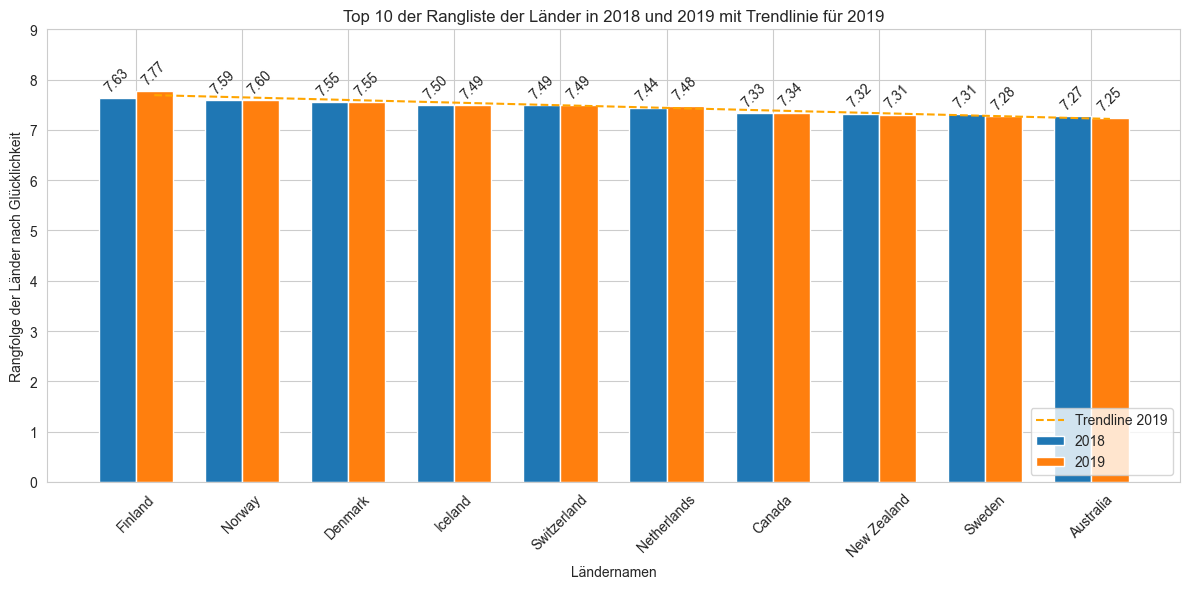

In [132]:
# Barplot for the first 10 countries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
glueck_2018_2019 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2018-2019.csv')

# Filter data for the first 10 ranking countries in 2018 and 2019
first_10_2018 = glueck_2018_2019[(glueck_2018_2019['Year'] == 2018) & (glueck_2018_2019['Overall rank'] <= 10)]
first_10_2019 = glueck_2018_2019[(glueck_2018_2019['Year'] == 2019) & (glueck_2018_2019['Overall rank'] <= 10)]

# Sort the data by 'Score' in descending order
first_10_2018 = first_10_2018.sort_values(by='Score', ascending=False)
first_10_2019 = first_10_2019.sort_values(by='Score', ascending=False)

# Create a single bar plot for both years
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(first_10_2018))

# Bar plot for 2018
bars_2018 = plt.bar(index, first_10_2018['Score'], width=bar_width, label='2018', align='center')

# Bar plot for 2019
bars_2019 = plt.bar(index + bar_width, first_10_2019['Score'], width=bar_width, label='2019', align='center')

# Annotate the top of the bars with values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom', rotation=45, fontsize=10)

annotate_bars(bars_2018)
annotate_bars(bars_2019)

# Add a trendline for 2019 using linear regression
from sklearn.linear_model import LinearRegression
model_2019 = LinearRegression().fit((index + bar_width).reshape(-1, 1), first_10_2019['Score'])
trendline_2019 = model_2019.predict((index + bar_width).reshape(-1, 1))
plt.plot(index + bar_width, trendline_2019, color='orange', linestyle='dashed', label='Trendline 2019')

plt.title('Top 10 der Rangliste der Länder in 2018 und 2019 mit Trendlinie für 2019')
plt.xlabel('Ländernamen')
plt.ylabel('Rangfolge der Länder nach Glücklichkeit')
plt.xticks(index + bar_width / 2, first_10_2018['Country or region'], rotation=45)
plt.ylim(0, 9)
# Move legend to the right lower corner
plt.legend(loc='lower right')

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('top_10_ranking_with_trendline.png', dpi=300, bbox_inches='tight')

plt.show()





In [97]:
# Interaktive plot for the first 10 Country


import pandas as pd
import plotly.express as px

# Load the dataset
glueck_2018_2019 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2018-2019.csv')

# Filter data for the first 10 ranking countries in 2018 and 2019
first_10_2018 = glueck_2018_2019[(glueck_2018_2019['Year'] == 2018) & (glueck_2018_2019['Overall rank'] <= 10)]
first_10_2019 = glueck_2018_2019[(glueck_2018_2019['Year'] == 2019) & (glueck_2018_2019['Overall rank'] <= 10)]

# Sort the data by 'Score' in descending order
first_10_2018 = first_10_2018.sort_values(by='Score', ascending=False)
first_10_2019 = first_10_2019.sort_values(by='Score', ascending=False)

# Create an interactive bar plot for both years using Plotly
fig = px.bar(data_frame=first_10_2018, x='Country or region', y='Score', text='Score',
             labels={'Score': 'Happiness Score'},
             title='Top 10 Ranking Countries in 2018',
             template='plotly')

# Add annotations to the top of the bars
for trace in fig.data:
    fig.add_annotation(
        text=f'{trace.y[-1]:.2f}',
        x=trace.x[-1],
        y=trace.y[-1],
        xanchor='center',
        yanchor='bottom',
        showarrow=False,
        font=dict(size=10)
    )

# Create an interactive bar plot for 2019
fig2 = px.bar(data_frame=first_10_2019, x='Country or region', y='Score', text='Score',
              labels={'Score': 'Happiness Score'},
              title='Top 10 Ranking Countries in 2019',
              template='plotly')

# Add annotations to the top of the bars for 2019
for trace in fig2.data:
    fig2.add_annotation(
        text=f'{trace.y[-1]:.2f}',
        x=trace.x[-1],
        y=trace.y[-1],
        xanchor='center',
        yanchor='bottom',
        showarrow=False,
        font=dict(size=10)
    )

# Display the interactive plots
fig.show()
fig2.show()


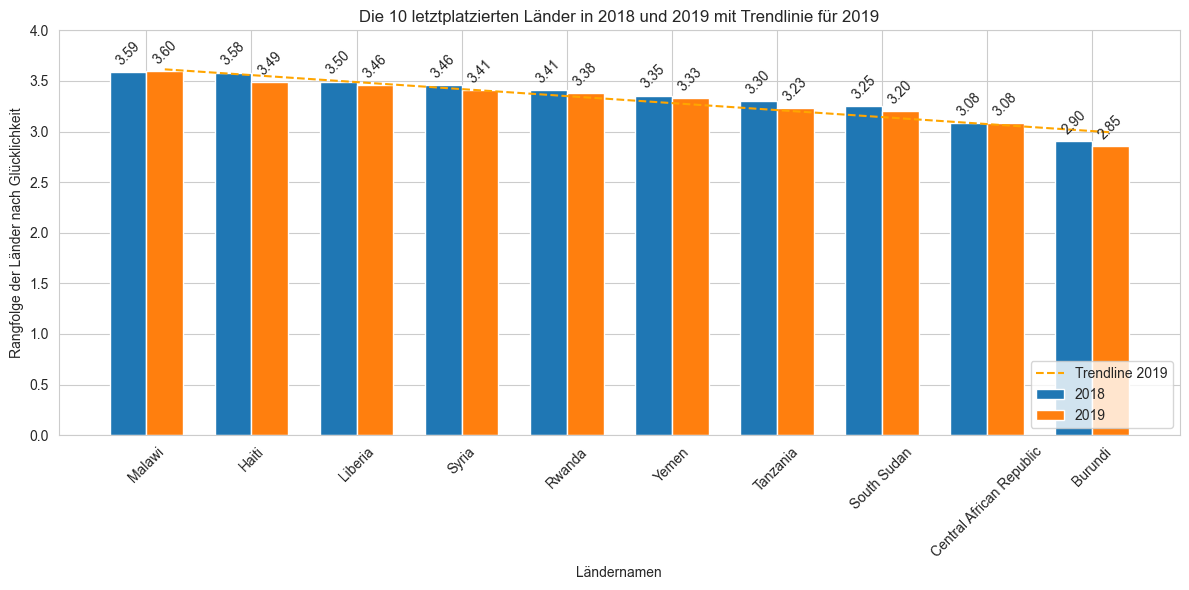

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the dataset
glueck_2018_2019 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2018-2019.csv')

# Filter data for the last 10 ranking countries in 2018 and 2019
last_10_2018 = glueck_2018_2019[(glueck_2018_2019['Year'] == 2018) & (glueck_2018_2019['Overall rank'] > 156 - 10)]
last_10_2019 = glueck_2018_2019[(glueck_2018_2019['Year'] == 2019) & (glueck_2018_2019['Overall rank'] > 156 - 10)]

# Sort the data by 'Score' in ascending order
last_10_2018 = last_10_2018.sort_values(by='Score', ascending=False)
last_10_2019 = last_10_2019.sort_values(by='Score', ascending=False)

# Create a single bar plot for both years
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(last_10_2018))

# Bar plot for 2018
bars_2018 = plt.bar(index, last_10_2018['Score'], width=bar_width, label='2018', align='center')

# Bar plot for 2019
bars_2019 = plt.bar(index + bar_width, last_10_2019['Score'], width=bar_width, label='2019', align='center')

# Annotate the top of the bars with values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom', rotation=45, fontsize=10)

annotate_bars(bars_2018)
annotate_bars(bars_2019)


model_2019 = LinearRegression().fit((index + bar_width).reshape(-1, 1), last_10_2019['Score'])
trendline_2019 = model_2019.predict((index + bar_width).reshape(-1, 1))
plt.plot(index + bar_width, trendline_2019, color='orange', linestyle='dashed', label='Trendline 2019')

plt.title('Die 10 letztplatzierten Länder in 2018 und 2019 mit Trendlinie für 2019')
plt.xlabel('Ländernamen')
plt.ylabel('Rangfolge der Länder nach Glücklichkeit')
plt.xticks(index + bar_width / 2, last_10_2018['Country or region'], rotation=45)
plt.ylim(0, 4)
# Move legend to the right lower corner
plt.legend(loc='lower right')

plt.savefig('last_10_rankings_with_trendline',dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


# Find contries where columns_to_analyze = 'GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity', 'Perceptions of corruption' are null

Freedom to make life choices

In [36]:
import pandas as pd

# Load the dataset
glueck_2018_2019 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2018-2019.csv')

# Select rows where 'Freedom to make life choices' column has the value 0.000
selected_countries = glueck_2018_2019[glueck_2018_2019['Freedom to make life choices'] == 0.000]['Country or region']

print("Country with null values are",selected_countries)

Country with null values are 0    Afghanistan
6         Angola
Name: Country or region, dtype: object


In [37]:
selected_countries = glueck_2018_2019[glueck_2018_2019['GDP per capita'] == 0.000]['Country or region']

print("Country with null values are",selected_countries)

Country with null values are 250    Somalia
251    Somalia
Name: Country or region, dtype: object


In [69]:
# Select data for the year 2018
glueck_2018 = glueck_2018_2019[glueck_2018_2019['Year'] == 2018]

# Columns to analyze
columns_to_analyze = ['Score','GDP per capita', 'Social support', 'Healthy life expectancy',
                      'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Calculate max, min, and average for each column
max_values = glueck_2018[columns_to_analyze].max()
min_values = glueck_2018[columns_to_analyze].min()
average_values = glueck_2018[columns_to_analyze].mean()

# Display the results
print("Maximum values 2018:")
print(max_values)
print("\nMinimum values 2018:")
print(min_values)
print("\nAverage values 2018:")
print(average_values)

Maximum values 2018:
Score                           7.632
GDP per capita                  2.096
Social support                  1.644
Healthy life expectancy         1.030
Freedom to make life choices    0.724
Generosity                      0.598
Perceptions of corruption       0.457
dtype: float64

Minimum values 2018:
Score                           2.905
GDP per capita                  0.000
Social support                  0.000
Healthy life expectancy         0.000
Freedom to make life choices    0.000
Generosity                      0.000
Perceptions of corruption       0.000
dtype: float64

Average values 2018:
Score                           5.375917
GDP per capita                  0.891449
Social support                  1.213237
Healthy life expectancy         0.597346
Freedom to make life choices    0.454506
Generosity                      0.181006
Perceptions of corruption       0.112449
dtype: float64


In [70]:
# Select data for the year 2019
glueck_2019 = glueck_2018_2019[glueck_2018_2019['Year'] == 2019]

# Columns to analyze
columns_to_analyze = ['Score','GDP per capita', 'Social support', 'Healthy life expectancy',
                      'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Calculate max, min, and average for each column
max_values = glueck_2019[columns_to_analyze].max()
min_values = glueck_2019[columns_to_analyze].min()
average_values = glueck_2019[columns_to_analyze].mean()

# Display the results
print("Maximum values 2019:")
print(max_values)
print("\nMinimum values 2019:")
print(min_values)
print("\nAverage values 2019:")
print(average_values)

Maximum values 2019:
Score                           7.769
GDP per capita                  1.684
Social support                  1.624
Healthy life expectancy         1.141
Freedom to make life choices    0.631
Generosity                      0.566
Perceptions of corruption       0.453
dtype: float64

Minimum values 2019:
Score                           2.853
GDP per capita                  0.000
Social support                  0.000
Healthy life expectancy         0.000
Freedom to make life choices    0.000
Generosity                      0.000
Perceptions of corruption       0.000
dtype: float64

Average values 2019:
Score                           5.407096
GDP per capita                  0.905147
Social support                  1.208814
Healthy life expectancy         0.725244
Freedom to make life choices    0.392571
Generosity                      0.184846
Perceptions of corruption       0.110603
dtype: float64


In [ ]:
data_2018 = glueck_2018_2019[glueck_2018_2019['Year'] == 2018]
data_2019 = glueck_2018_2019[glueck_2018_2019['Year'] == 2019]

In [29]:
data_2018 = glueck_2018_2019[glueck_2018_2019['Year'] == 2018]
data_2018

Overall rank Country or region  Year  Score  GDP per capita  \
1             145       Afghanistan  2018  3.632           0.332   
3             112           Albania  2018  4.586           0.916   
5              84           Algeria  2018  5.295           0.979   
6             142            Angola  2018  3.795           0.730   
8              29         Argentina  2018  6.388           1.073   
..            ...               ...   ...    ...             ...   
303           102         Venezuela  2018  4.806           0.996   
305            95           Vietnam  2018  5.103           0.715   
307           152             Yemen  2018  3.355           0.442   
309           125            Zambia  2018  4.377           0.562   
311           144          Zimbabwe  2018  3.692           0.357   

     Social support  Healthy life expectancy  Freedom to make life choices  \
1             0.537                    0.255                         0.085   
3             0.817                    0.790                         0.419   
5             1.154                    0.687                         0.077   
6             1.125                    0.269                         0.000   
8             1.468                    0.744                         0.570   
..              ...                      ...                           ...   
303           1.469                    0.657                         0.133   
305           1.365                    0.702                         0.618   
307           1.073                    0.343                         0.244   
309           1.047                    0.295                         0.503   
311           1.094                    0.248                         0.406   

     Generosity  Perceptions of corruption  
1         0.191                      0.036  
3         0.149                      0.032  
5         0.055                      0.135  
6         0.079                      0.061  
8         0.062                      0.054  
..          ...                        ...  
303       0.056                      0.052  
305       0.177                      0.079  
307       0.083                      0.064  
309       0.221                      0.082  
311       0.132                      0.099  

[156 rows x 10 columns]

In [10]:
# Check for missing values
print(glueck_2018.isna().sum())

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


In [11]:
print(glueck_2019.isna().sum())

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


In [12]:
print(glueck_2018_2019.isna().sum())

Overall rank                    0
Country or region               0
Year                            0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


In [13]:
print('Columns:',  'Number of columns ',len(glueck_2018_2019.columns), '\n', glueck_2018_2019.columns)

Columns: Number of columns  10 
 Index(['Overall rank', 'Country or region', 'Year', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [15]:
# 1. Korrelationsanalyse: Beginne damit, die Korrelationen zwischen den verschiedenen Faktoren und der Glücklichkeitswert zu berechnen. Die Korrelationskoeffizienten zeigen an, wie stark die Variablen miteinander zusammenhängen.

# Select the columns of interest
columns_of_interest = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                       'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Create a DataFrame with the selected columns
selected_data = glueck_2018_2019[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                                 Score  GDP per capita  Social support  \
Score                         1.000000        0.797977        0.761080   
GDP per capita                0.797977        1.000000        0.713293   
Social support                0.761080        0.713293        1.000000   
Healthy life expectancy       0.755875        0.816590        0.668207   
Freedom to make life choices  0.539897        0.342953        0.420206   
Generosity                    0.106645       -0.044788       -0.014367   
Perceptions of corruption     0.396947        0.310951        0.196076   

                              Healthy life expectancy  \
Score                                        0.755875   
GDP per capita                               0.816590   
Social support                               0.668207   
Healthy life expectancy                      1.000000   
Freedom to make life choices                 0.301488   
Generosity                                   0.001476   
Percepti

In [90]:
import pandas as pd

# Load the dataset
glueck_2018_2019 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2018-2019.csv')

# Rename the column 'GDP per capita' to 'GDP_per_capita'
glueck_2018_2019.rename(columns={'GDP per capita': 'GDP_per_capita'}, inplace=True)

# Print the updated DataFrame
print(glueck_2018_2019)

     Overall rank Country or region  Year  Score  GDP_per_capita  \
0             154       Afghanistan  2019  3.203           0.350   
1             145       Afghanistan  2018  3.632           0.332   
2             107           Albania  2019  4.719           0.947   
3             112           Albania  2018  4.586           0.916   
4              88           Algeria  2019  5.211           1.002   
..            ...               ...   ...    ...             ...   
307           152             Yemen  2018  3.355           0.442   
308           138            Zambia  2019  4.107           0.578   
309           125            Zambia  2018  4.377           0.562   
310           146          Zimbabwe  2019  3.663           0.366   
311           144          Zimbabwe  2018  3.692           0.357   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             0.517                    0.361                         0.000   
1             0.537        

#  Abhängigkeit des Glücklichkeitswerts vom GPD_pro_Kopf

In [91]:
#
import statsmodels.formula.api as smf

model = smf.ols('Score ~ GDP_per_capita', data=glueck_2018_2019)
model = model.fit()
print(model.summary())



## Kommentar: R-Quadrat: Das Bestimmtheitsmaß (R-Quadrat) beträgt 0,637. Dieser Wert zeigt an, dass etwa 63,7 % der Varianz der abhängigen Variable ("Glücklichkeitswert") durch die unabhängige Variable ("BIP_pro_Kopf") erklärt wird. Dies deutet auf einen mäßigen Grad an Erklärungskraft hin.

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     543.4
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           3.82e-70
Time:                        15:24:04   Log-Likelihood:                -318.08
No. Observations:                 312   AIC:                             640.2
Df Residuals:                     310   BIC:                             647.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3667      0.095     35.

# Abhängigkeit des Glücklichkeitswerts von der sozialen Unterstützung

In [13]:
glueck_2018_2019 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2018-2019.csv')

# Rename the column 'Social support' to ' Social_support'
glueck_2018_2019.rename(columns={'Social support': 'Social_support'}, inplace=True)

import statsmodels.formula.api as smf

model = smf.ols('Score ~ Social_support', data=glueck_2018_2019)
model = model.fit()
print(model.summary())

#### Kommentar: R-Quadrat: Das Bestimmtheitsmaß (R-Quadrat) beträgt 0,579. Dieser Wert zeigt an, dass etwa 57,9 % der Varianz der abhängigen Variable ("Glücklichkeitswert") durch die unabhängige Variable ("Sozialen Unterstützung") erklärt wird. Dies deutet auf einen mäßigen Grad an Erklärungskraft hin.

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     426.8
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           3.15e-60
Time:                        13:22:20   Log-Likelihood:                -341.02
No. Observations:                 312   AIC:                             686.0
Df Residuals:                     310   BIC:                             693.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.9706      0.171     11.

# Abhängigkeit des Glücklichkeitswerts von der Wert über die Lebenserwartung

In [11]:
glueck_2018_2019 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2018-2019.csv')

# Rename the column 'Social support' to ' Social_support'
glueck_2018_2019.rename(columns={'Healthy life expectancy': 'Healthy_life_expectancy'}, inplace=True)

import statsmodels.formula.api as smf

model = smf.ols('Score ~ Healthy_life_expectancy', data=glueck_2018_2019)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     413.2
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           5.66e-59
Time:                        14:43:39   Log-Likelihood:                -343.92
No. Observations:                 312   AIC:                             691.8
Df Residuals:                     310   BIC:                             699.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [15]:
glueck_2018_2019 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2018-2019.csv')

# Rename the column 'Social support' to ' Social_support'
glueck_2018_2019.rename(columns={'Healthy life expectancy': 'Healthy_life_expectancy'}, inplace=True)

import statsmodels.formula.api as smf

model = smf.ols('Score ~  Healthy_life_expectancy', data=glueck_2018_2019)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     413.2
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           5.66e-59
Time:                        13:24:06   Log-Likelihood:                -343.92
No. Observations:                 312   AIC:                             691.8
Df Residuals:                     310   BIC:                             699.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

# Dependants from  Freedom to make life choice

In [ ]:
import pandas as pd

# Load the dataset
glueck_2018_2019 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2018-2019.csv')

# Rename the column 'GDP per capita' to 'GDP_per_capita'
glueck_2018_2019.rename(columns={'GDP per capita': 'GDP_per_capita'}, inplace=True)

# Print the updated DataFrame
print(glueck_2018_2019)

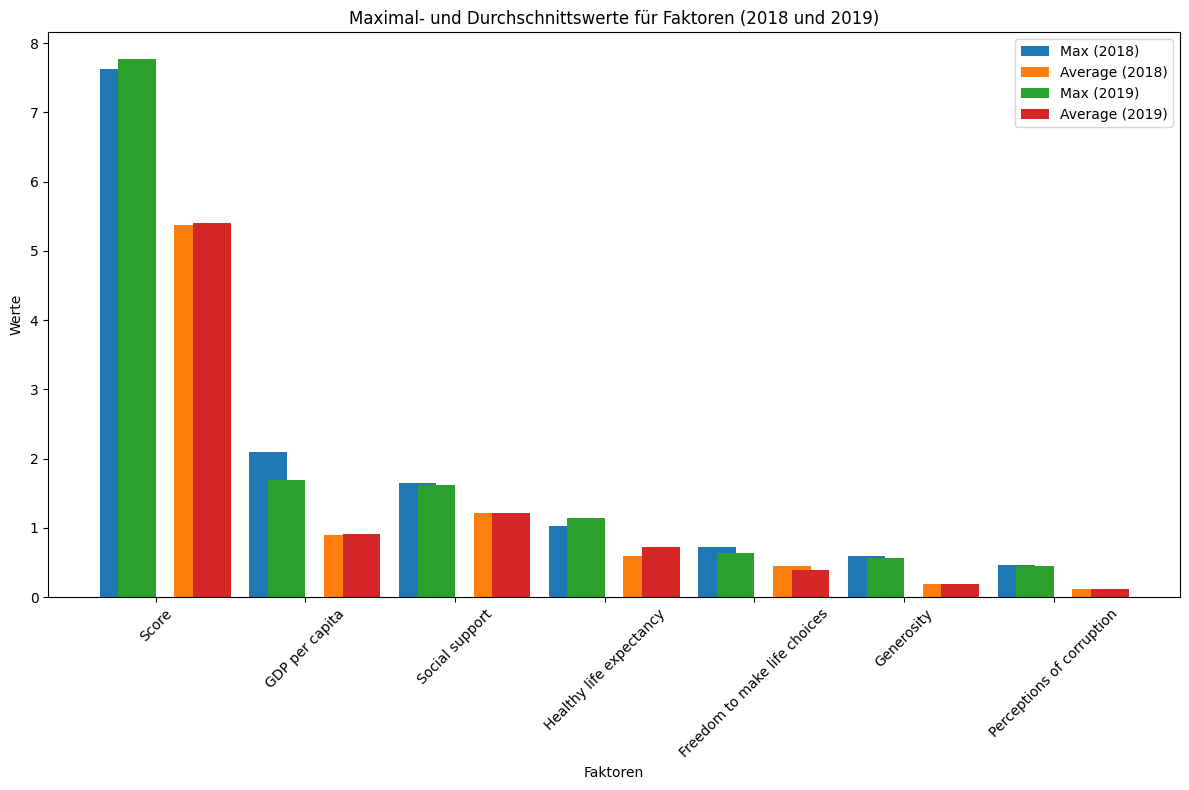

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
glueck_2018_2019 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2018-2019.csv')

# Columns to analyze
columns_to_analyze = ['Score','GDP per capita', 'Social support', 'Healthy life expectancy',
                      'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Calculate max, and average for each column for each year
max_values = glueck_2018_2019.groupby('Year')[columns_to_analyze].max()

average_values = glueck_2018_2019.groupby('Year')[columns_to_analyze].mean()

# Create a single grouped bar plot
plt.figure(figsize=(12, 8))
bar_width = 0.25
index = np.arange(len(columns_to_analyze))

# Plot bars for 2018
plt.bar(index, max_values.loc[2018], width=bar_width, label='Max (2018)', align='center')
plt.bar(index + 2 * bar_width, average_values.loc[2018], width=bar_width, label='Average (2018)', align='center')

# Plot bars for 2019
plt.bar(index, max_values.loc[2019], width=bar_width, label='Max (2019)', align='edge')
plt.bar(index + 2 * bar_width, average_values.loc[2019], width=bar_width, label='Average (2019)', align='edge')

plt.xlabel('Faktoren')
plt.ylabel('Werte')
plt.title('Maximal- und Durchschnittswerte für Faktoren (2018 und 2019)')
plt.xticks(index + bar_width, columns_to_analyze, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


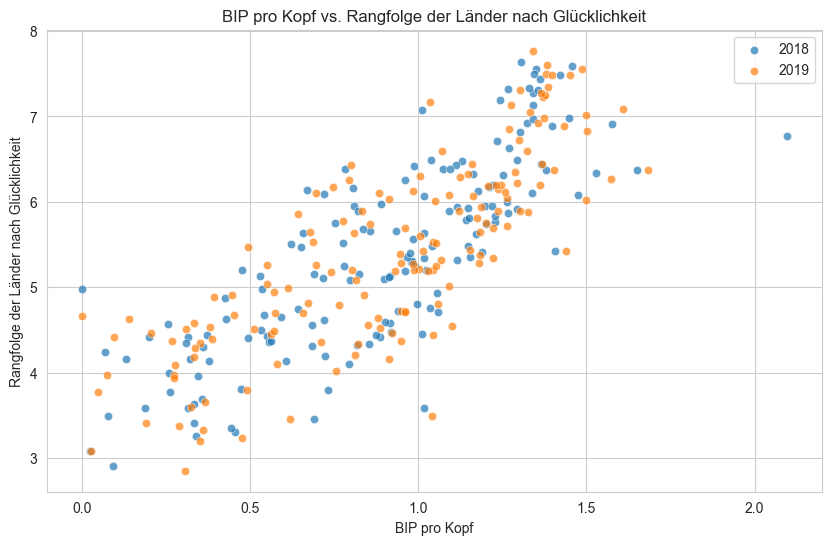

In [181]:
# 2. Streudiagramme: Streudiagramme, um den Zusammenhang zwischen den einzelnen Faktoren und der Glücklichkeitsbewertung zu visualisieren.
# Auf der x-Achse ist beispielsweise den BIP pro Kopf (GDP per capita) platziert und auf der y-Achse den Glücklichkeitswert (Score).

plt.figure(figsize=(10, 6))  # Set the figure size

# Plot GDP per capita vs. Happiness Score
# Scatter plot for GDP per capita vs. Happiness Score for 2018
sns.scatterplot(data=glueck_2018_2019[glueck_2018_2019['Year'] == 2018], x='GDP per capita', y='Score', label='2018', alpha=0.7)

# Scatter plot for GDP per capita vs. Happiness Score for 2019
sns.scatterplot(data=glueck_2018_2019[glueck_2018_2019['Year'] == 2019], x='GDP per capita', y='Score', label='2019', alpha=0.7)

plt.title('BIP pro Kopf vs. Rangfolge der Länder nach Glücklichkeit')
plt.xlabel('BIP pro Kopf')
plt.ylabel('Rangfolge der Länder nach Glücklichkeit')
plt.legend()
plt.savefig('Scatter',dpi=300, bbox_inches='tight')
plt.show()

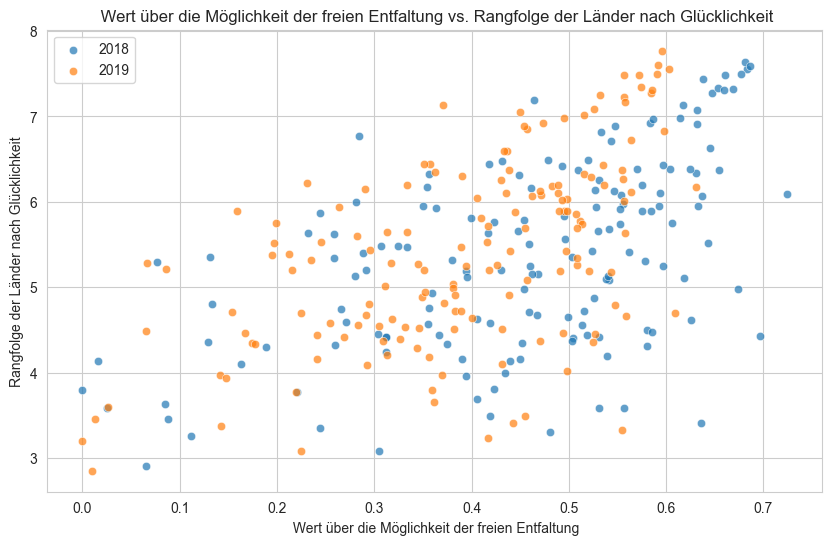

In [184]:
# 2. Streudiagramme: Streudiagramme, um den Zusammenhang zwischen den einzelnen Faktoren und der Glücklichkeitsbewertung zu visualisieren.
# Auf der x-Achse ist beispielsweise den BIP pro Kopf (GDP per capita) platziert und auf der y-Achse den Glücklichkeitswert (Score).

plt.figure(figsize=(10, 6))  # Set the figure size

# Plot GDP per capita vs. Happiness Score
# Scatter plot for GDP per capita vs. Happiness Score for 2018
sns.scatterplot(data=glueck_2018_2019[glueck_2018_2019['Year'] == 2018], x='Freedom to make life choices', y='Score', label='2018', alpha=0.7)

# Scatter plot for GDP per capita vs. Happiness Score for 2019
sns.scatterplot(data=glueck_2018_2019[glueck_2018_2019['Year'] == 2019], x='Freedom to make life choices', y='Score', label='2019', alpha=0.7)

plt.title(' Wert über die Möglichkeit der freien Entfaltung vs. Rangfolge der Länder nach Glücklichkeit')
plt.xlabel(' Wert über die Möglichkeit der freien Entfaltung')
plt.ylabel('Rangfolge der Länder nach Glücklichkeit')
plt.legend()
plt.savefig('Scatter1',dpi=300, bbox_inches='tight')
plt.show()

In [162]:
import plotly.express as px

# Filter data for the years 2018 and 2019
filtered_data = glueck_2018_2019[(glueck_2018_2019['Year'] == 2018) | (glueck_2018_2019['Year'] == 2019)]

# Create an interactive scatter plot using plotly express
fig = px.scatter(filtered_data, x='GDP_per_capita', y='Score', color='Year',
                 title='GDP per Capita vs. Happiness Score',
                 labels={'GDP_per_capita': 'GDP per Capita', 'Score': 'Happiness Score'})

# Show the plot
fig.show()


In [58]:
import pandas as pd
import plotly.express as px

# Load the dataset
glueck_2018_2019 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2018-2019.csv')

# Filter data for 2018 and 2019
data_2018 = glueck_2018_2019[glueck_2018_2019['Year'] == 2018]
data_2019 = glueck_2018_2019[glueck_2018_2019['Year'] == 2019]

# Create interactive scatter plot with trendlines
fig = px.scatter(glueck_2018_2019, x='GDP per capita', y='Score', color='Year',
                 trendline='ols', # Add trendline
                 labels={'GDP per capita': 'GDP per Capita', 'Score': 'Happiness Score'},
                 title='GDP per Capita vs. Happiness Score')

# Add scatter traces for 2018 and 2019 with legend
fig.add_scatter(x=data_2018['GDP per capita'], y=data_2018['Score'], mode='markers', name='2018')
fig.add_scatter(x=data_2019['GDP per capita'], y=data_2019['Score'], mode='markers', name='2019')

# Show the interactive plot
fig.show()



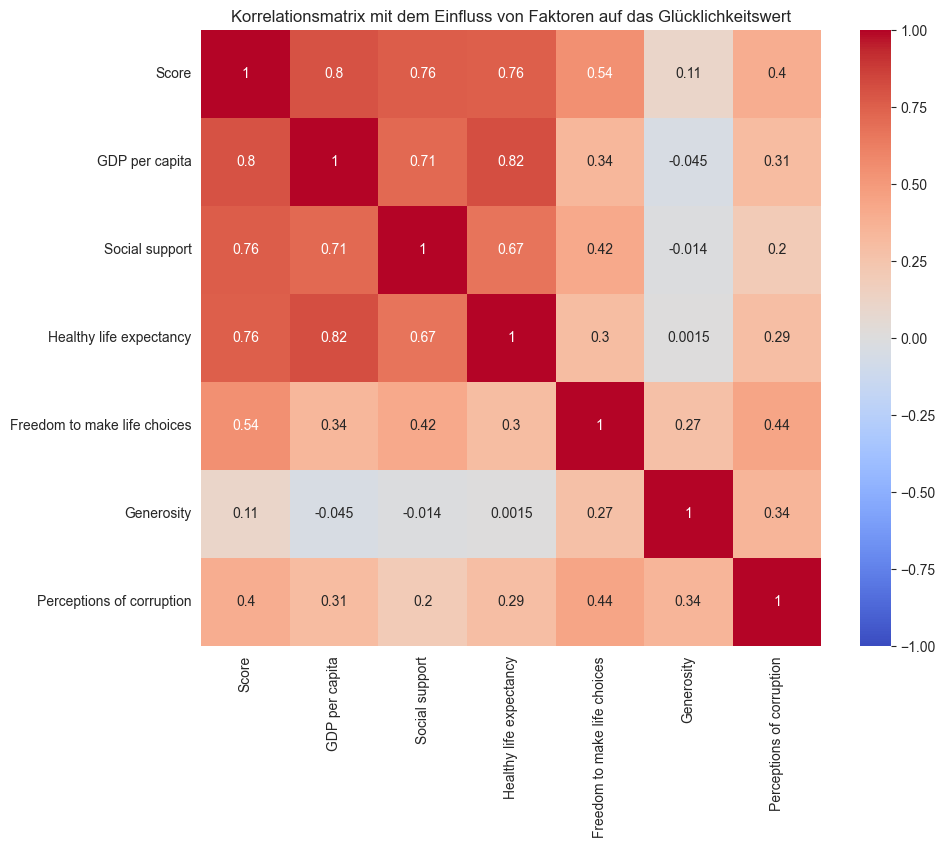

In [174]:
#Using a heatmap to show the correlatlion matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select the columns of interest
columns_of_interest = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                       'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Create a DataFrame with the selected columns
selected_data = glueck_2018_2019[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korrelationsmatrix mit dem Einfluss von Faktoren auf das Glücklichkeitswert')
plt.savefig('Korrelation',dpi=300, bbox_inches='tight')
plt.show()


# Regressionsanalyse: eine multiple lineare Regressionsanalyse durch, um den Einfluss mehrerer Faktoren gleichzeitig auf die Glücklichkeitsbewertung zu untersuchen. So sehen wir, wie stark jeder Faktor individuell zur Vorhersage der Glücklichkeit beiträgt.

In [19]:
import pandas as pd
import statsmodels.api as sm


columns_for_regression = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                          'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Create a DataFrame with the selected columns
regression_data = glueck_2018_2019[columns_for_regression]

# Prepare the data for regression analysis
X = regression_data.iloc[:, 1:]  # Independent variables (factors)
y = regression_data.iloc[:, 0]   # Dependent variable (Happiness Score)

# Add a constant term to the independent variables (intercept)
X = sm.add_constant(X)

# Perform the multiple linear regression
model = sm.OLS(y, X).fit()

# Display regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           3.21e-98
Time:                        09:38:01   Log-Likelihood:                -237.33
No. Observations:                 312   AIC:                             488.7
Df Residuals:                     305   BIC:                             514.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
# 6 Boxplots : Erstelle Boxplots um die Verteilung der verschiedenen Faktoren in Bezug auf die Glücklichkeitsrangfolge zu visualisiere

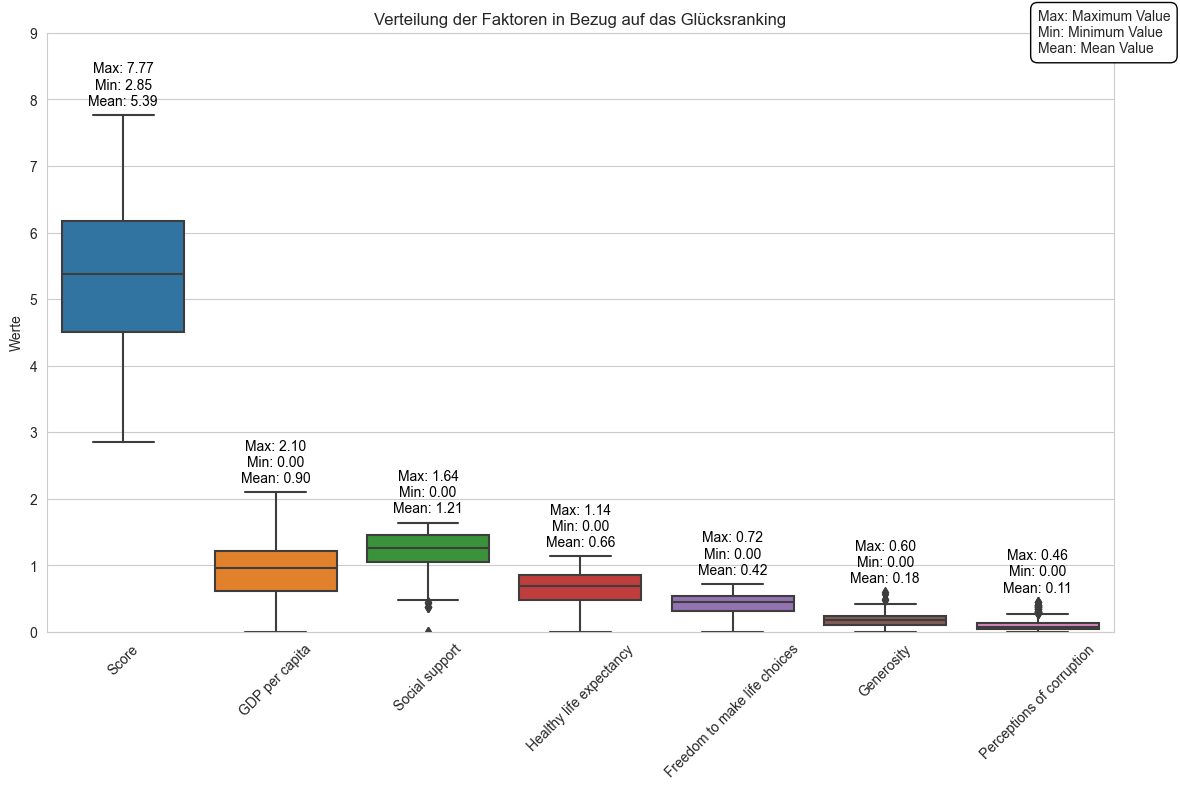

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
glueck_2018_2019 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2018-2019.csv')

# Select the columns of interest
columns_of_interest = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                       'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Create boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=glueck_2018_2019[columns_of_interest])
plt.xticks(rotation=45)
plt.title('Verteilung der Faktoren in Bezug auf das Glücksranking')
plt.ylabel('Werte')
plt.ylim(0,9)

# Annotate numerical values on top of the boxplots
for i, column in enumerate(columns_of_interest):
    data = glueck_2018_2019[column]
    y_position = data.max() + 0.1  # Adjust the vertical position of the text
    plt.text(i, y_position, f"Max: {data.max():.2f}\nMin: {data.min():.2f}\nMean: {data.mean():.2f}",
             ha='center', va='bottom', fontsize=10, color='black')

# Create a custom legend using a text box
legend_text = ("Max: Maximum Value\n"
               "Min: Minimum Value\n"
               "Mean: Mean Value")
plt.text(len(columns_of_interest) - 1, plt.ylim()[1] - 0.3, legend_text, fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()

plt.savefig('boxplot.png',dpi=300,bbox_inches='tight')

plt.show()


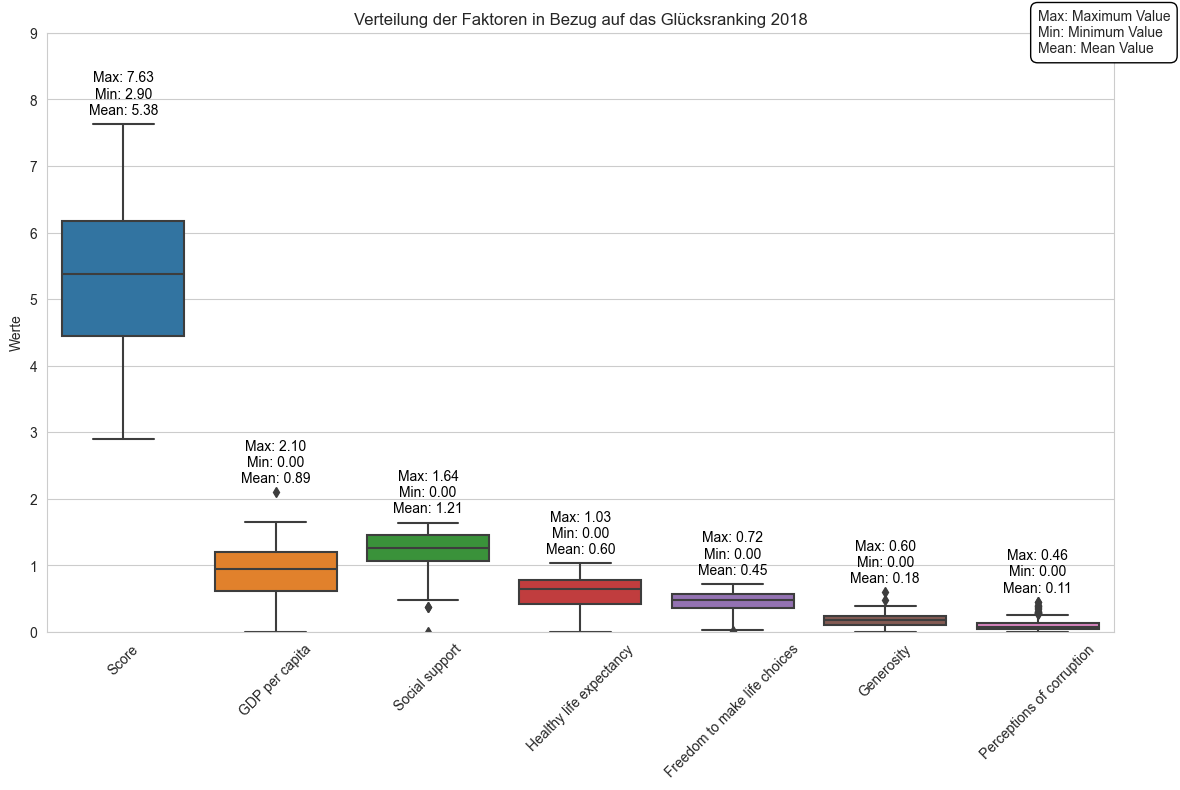

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
glueck_2018= pd.read_csv('20230828_3.3_Datensatz_Glueck_2018.csv')

# Select the columns of interest
columns_of_interest = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                       'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Create boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=glueck_2018[columns_of_interest])
plt.xticks(rotation=45)
plt.title('Verteilung der Faktoren in Bezug auf das Glücksranking 2018')
plt.ylabel('Werte')
plt.ylim(0,9)

# Annotate numerical values on top of the boxplots
for i, column in enumerate(columns_of_interest):
    data = glueck_2018[column]
    y_position = data.max() + 0.1  # Adjust the vertical position of the text
    plt.text(i, y_position, f"Max: {data.max():.2f}\nMin: {data.min():.2f}\nMean: {data.mean():.2f}",
             ha='center', va='bottom', fontsize=10, color='black')

# Create a custom legend using a text box
legend_text = ("Max: Maximum Value\n"
               "Min: Minimum Value\n"
               "Mean: Mean Value")
plt.text(len(columns_of_interest) - 1, plt.ylim()[1] - 0.3, legend_text, fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()

#plt.savefig('boxplot.png',dpi=300,bbox_inches='tight')

plt.show()

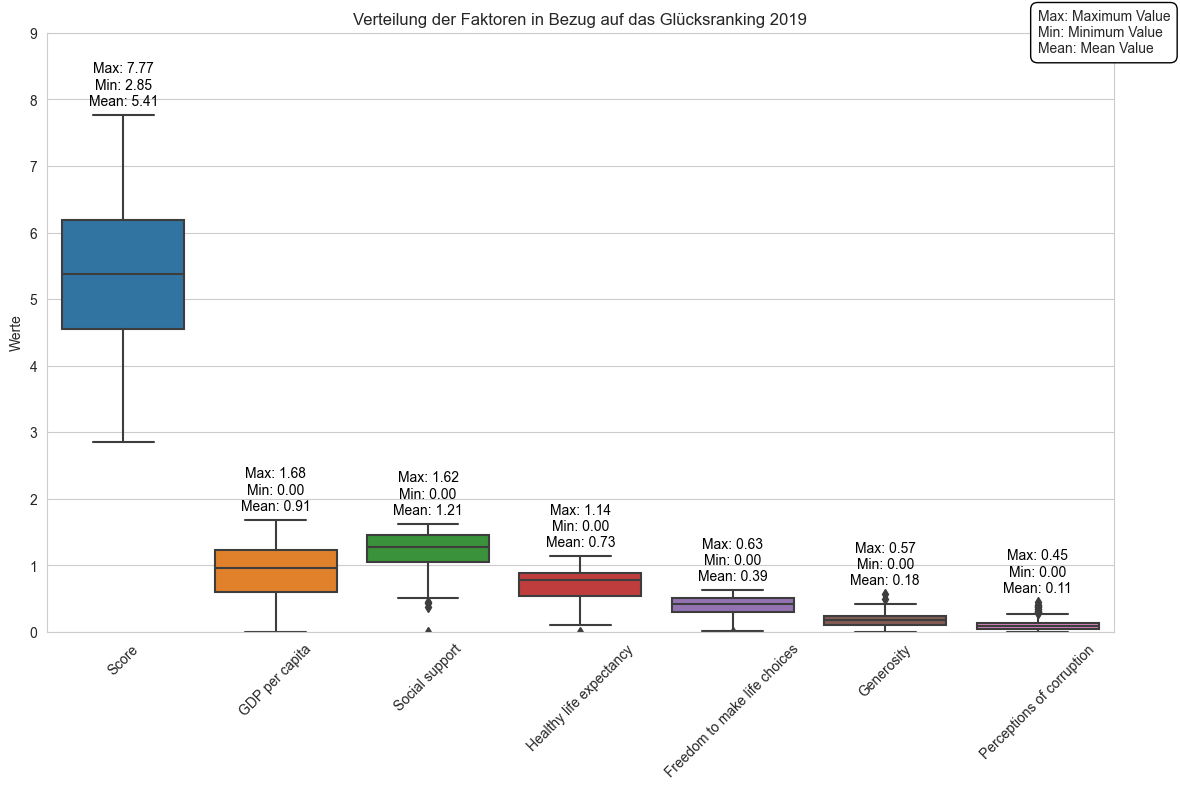

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
glueck_2019 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2019.csv')

# Select the columns of interest
columns_of_interest = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                       'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Create boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=glueck_2019[columns_of_interest])
plt.xticks(rotation=45)
plt.title('Verteilung der Faktoren in Bezug auf das Glücksranking 2019')
plt.ylabel('Werte')
plt.ylim(0,9)

# Annotate numerical values on top of the boxplots
for i, column in enumerate(columns_of_interest):
    data = glueck_2019[column]
    y_position = data.max() + 0.1  # Adjust the vertical position of the text
    plt.text(i, y_position, f"Max: {data.max():.2f}\nMin: {data.min():.2f}\nMean: {data.mean():.2f}",
             ha='center', va='bottom', fontsize=10, color='black')

# Create a custom legend using a text box
legend_text = ("Max: Maximum Value\n"
               "Min: Minimum Value\n"
               "Mean: Mean Value")
plt.text(len(columns_of_interest) - 1, plt.ylim()[1] - 0.3, legend_text, fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()

plt.savefig('boxplot.png',dpi=300,bbox_inches='tight')

plt.show()

C:\Users\User\Desktop\Python\pythonProject\pythonProject\Code\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



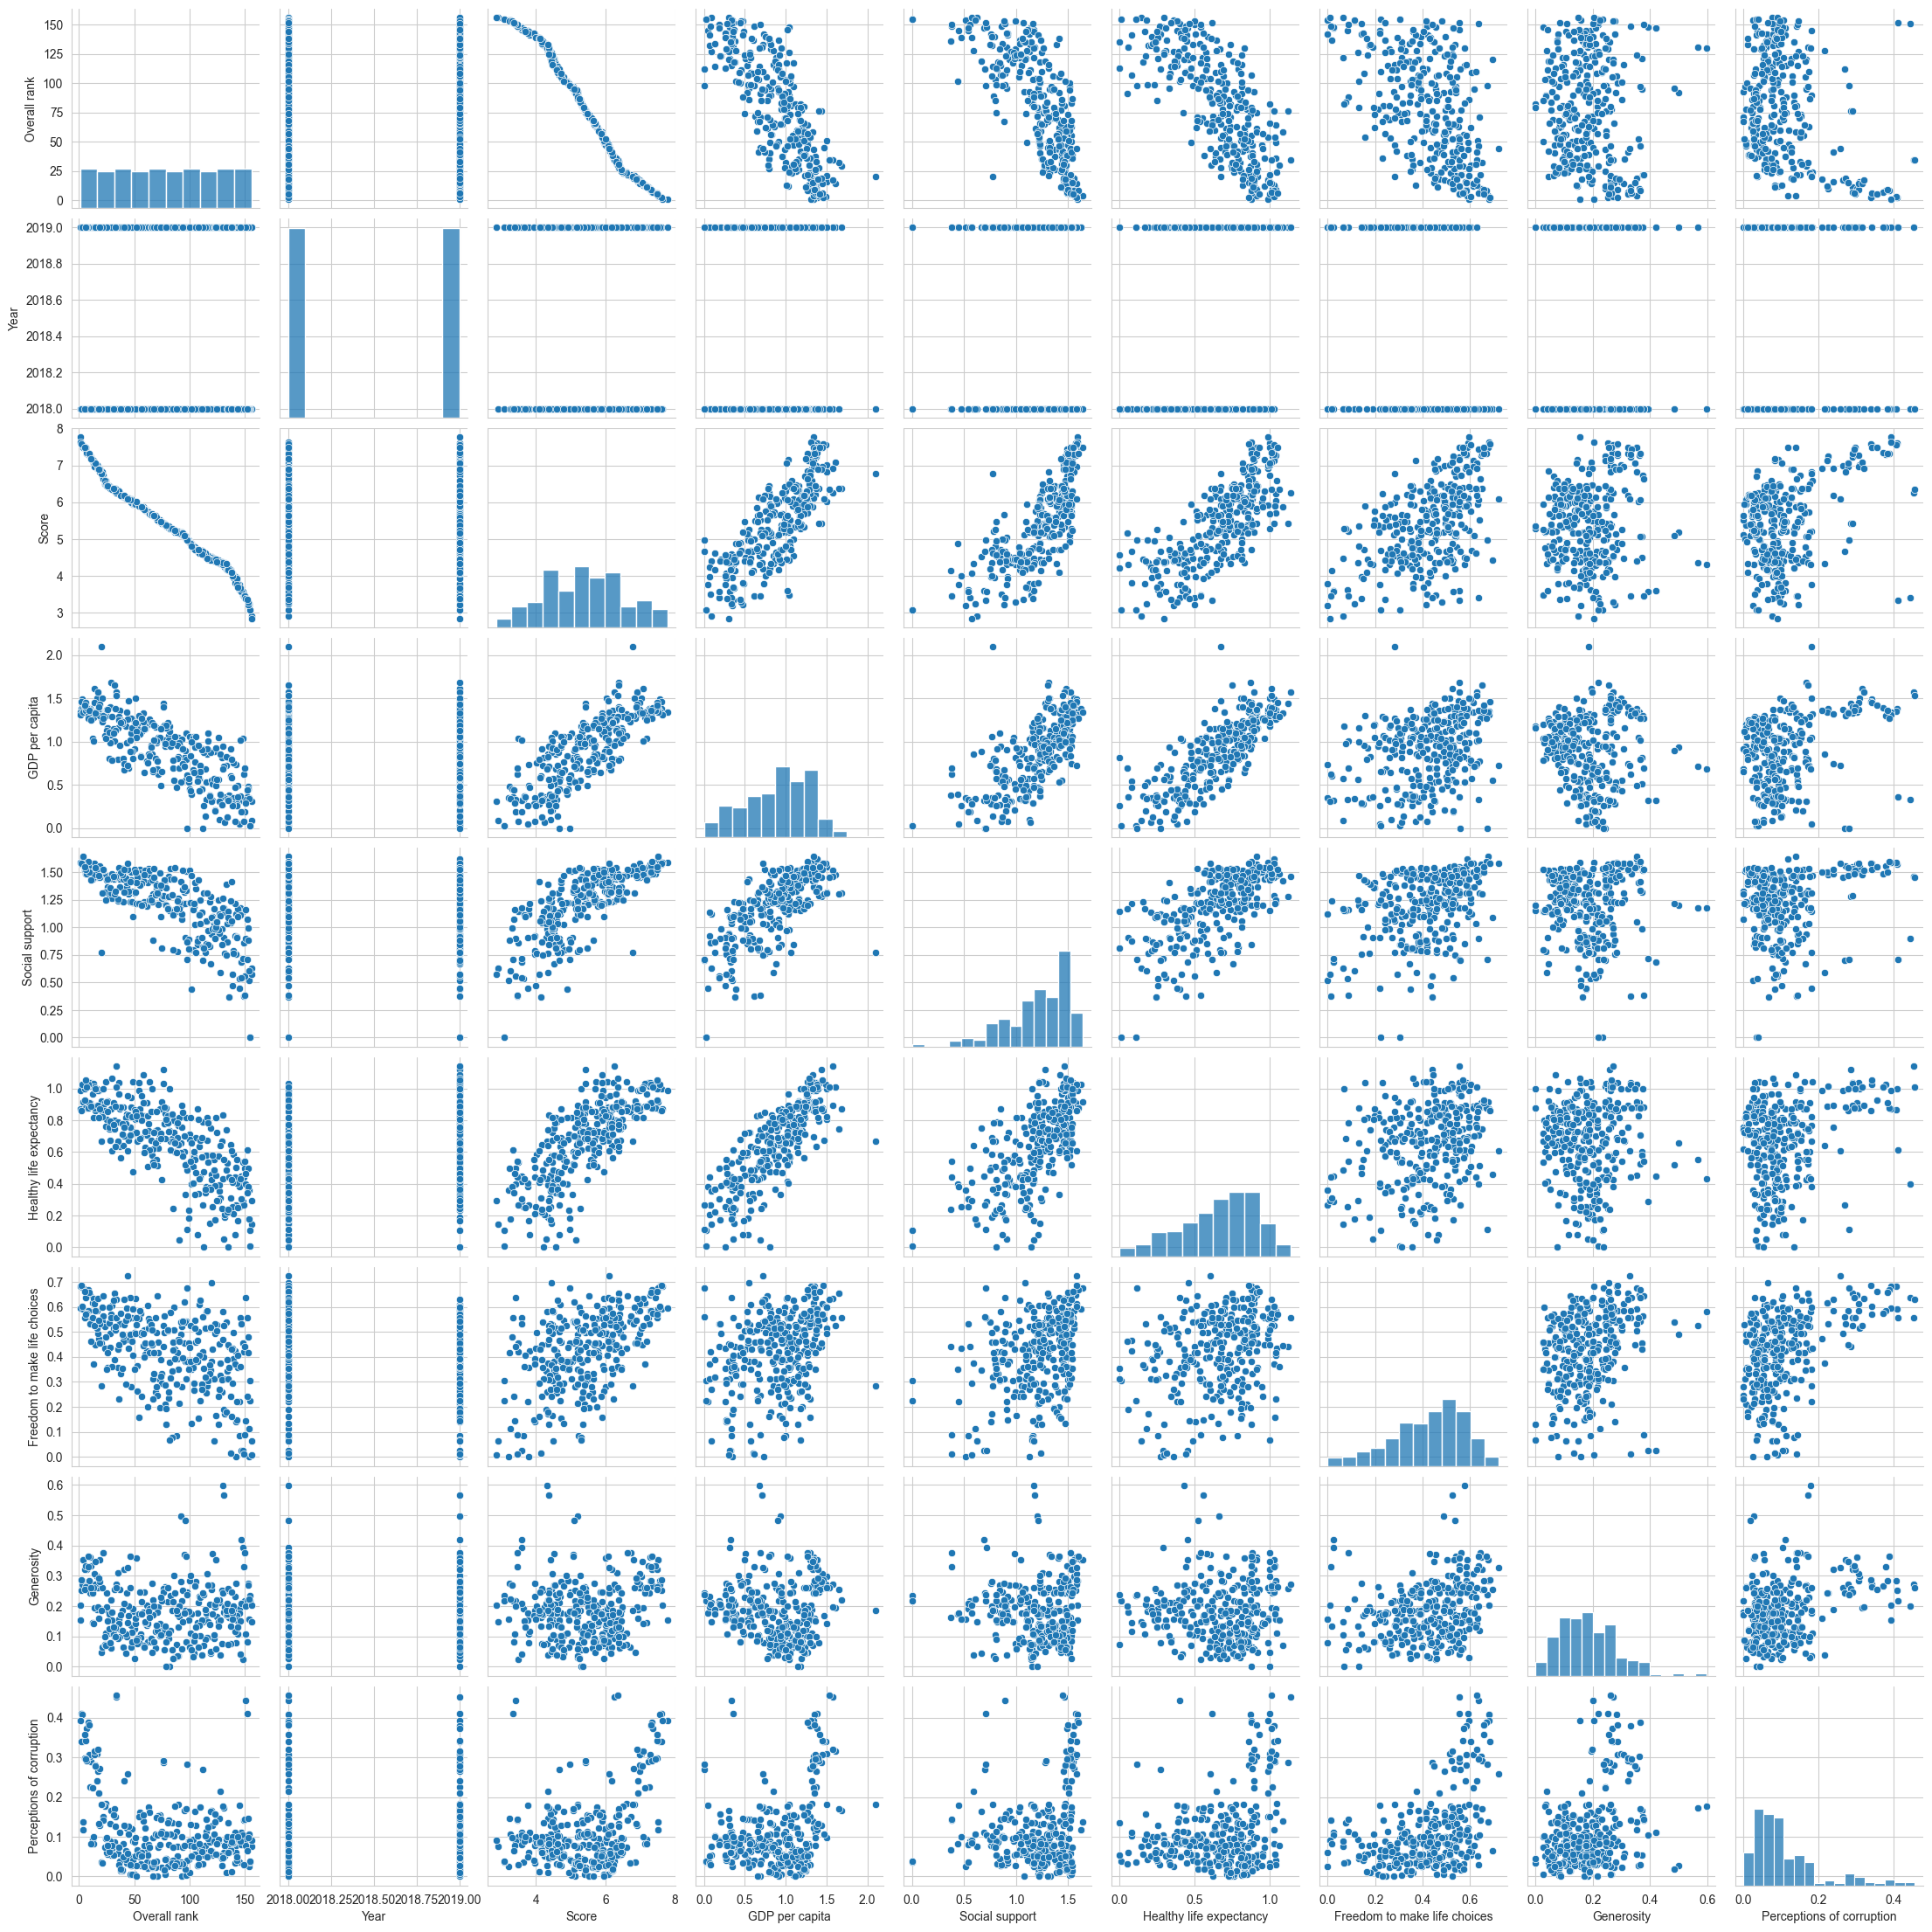

In [119]:
#

sns.set_style(style="whitegrid")

sns.pairplot(glueck_2018_2019)
plt.show()

C:\Users\User\Desktop\Python\pythonProject\pythonProject\Code\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



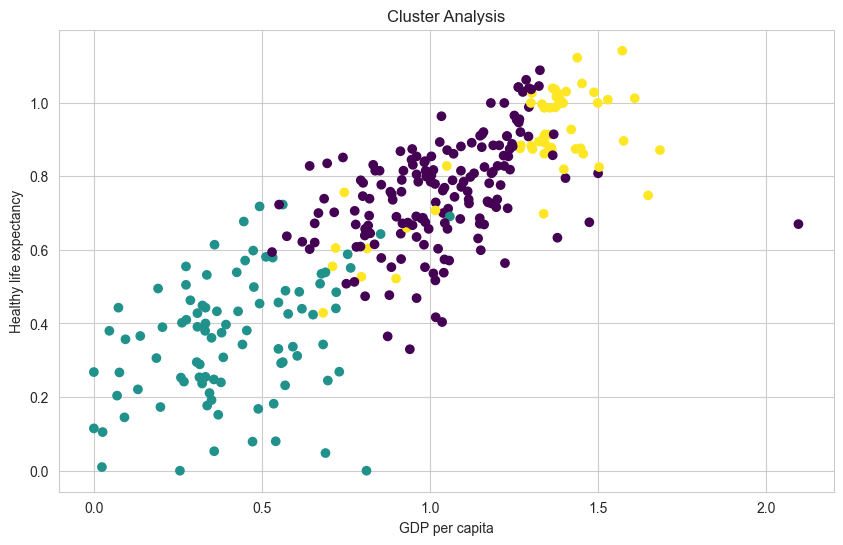

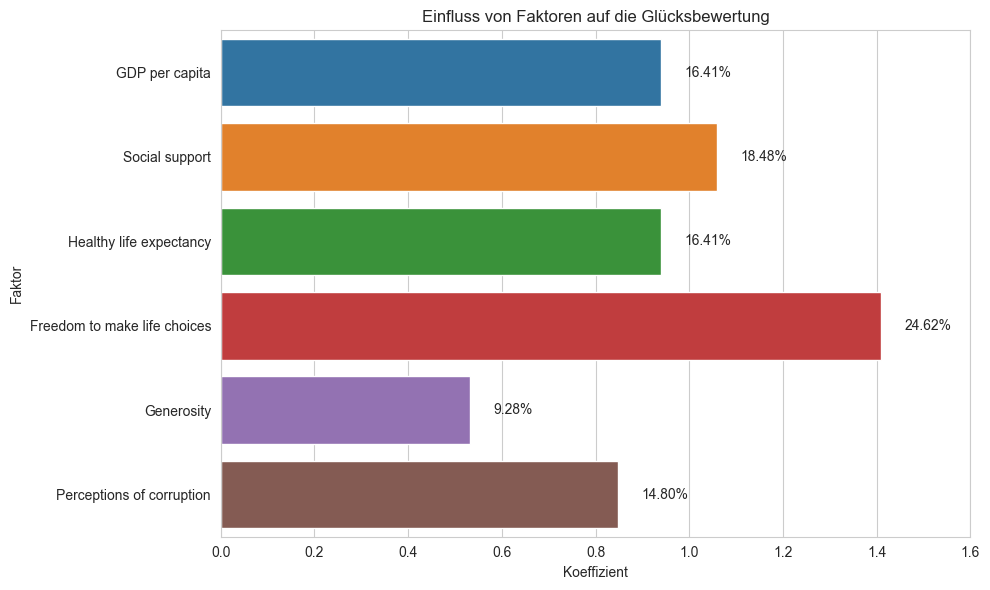

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
glueck_2018_2019 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2018-2019.csv')

# Select columns for analysis
columns_to_analyze = ['GDP per capita', 'Social support', 'Healthy life expectancy',
                      'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Prepare the data
X = glueck_2018_2019[columns_to_analyze]
y = glueck_2018_2019['Score']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get coefficients and their corresponding column names
coefficients = model.coef_
coefficients_df = pd.DataFrame({'Factor': columns_to_analyze, 'Coefficient': coefficients})

# Calculate the total influence (sum of absolute coefficients)
total_influence = coefficients_df['Coefficient'].abs().sum()

# Calculate the percentage of influence for each factor
coefficients_df['Percentage'] = (coefficients_df['Coefficient'].abs() / total_influence) * 100

# Create a bar plot to show the influence of each factor on the score
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Coefficient', y='Factor', data=coefficients_df)
plt.title('Einfluss von Faktoren auf die Glücksbewertung')
plt.xlabel('Koeffizient')
plt.ylabel('Faktor')
plt.xlim(0,1.6)
# Annotate the top of the bars with percentage values
for p, value in zip(ax.patches, coefficients_df['Percentage']):
    width = p.get_width()
    plt.text(width + 0.05, p.get_y() + p.get_height() / 2,
             f'{value:.2f}%', ha='left', va='center')



plt.savefig('Influence.png',dpi=300,bbox_inches='tight')

plt.tight_layout()
plt.show()


In [145]:
import pandas as pd

# Load the dataset
glueck_2018_2019 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2018-2019.csv')

# Calculate Pearson correlation coefficients
correlation_matrix = glueck_2018_2019[['Score', 'GDP per capita', 'Social support',
                                       'Healthy life expectancy', 'Freedom to make life choices',
                                       'Generosity', 'Perceptions of corruption']].corr()

# Print the correlation matrix
print(correlation_matrix)

# Extract the correlation coefficient between 'Score' and other factors
correlation_with_score = correlation_matrix['Score'][1:]

# Print the correlation coefficients
for factor, correlation in correlation_with_score.items():
    print(f"Correlation between 'Score' and '{factor}': {correlation:.2f}")


                                 Score  GDP per capita  Social support  \
Score                         1.000000        0.797977        0.761080   
GDP per capita                0.797977        1.000000        0.713293   
Social support                0.761080        0.713293        1.000000   
Healthy life expectancy       0.755875        0.816590        0.668207   
Freedom to make life choices  0.539897        0.342953        0.420206   
Generosity                    0.106645       -0.044788       -0.014367   
Perceptions of corruption     0.396947        0.310951        0.196076   

                              Healthy life expectancy  \
Score                                        0.755875   
GDP per capita                               0.816590   
Social support                               0.668207   
Healthy life expectancy                      1.000000   
Freedom to make life choices                 0.301488   
Generosity                                   0.001476   
Percepti

In [146]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
glueck_2018_2019 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2018-2019.csv')

# Define the threshold for splitting the groups (e.g., GDP per capita)
threshold = 1.0  # Replace with your threshold value

# Split the dataset into two groups based on the threshold
low_income_group = glueck_2018_2019[glueck_2018_2019['GDP per capita'] <= threshold]
high_income_group = glueck_2018_2019[glueck_2018_2019['GDP per capita'] > threshold]

# Perform the T-Test for independent samples
t_statistic, p_value = ttest_ind(low_income_group['Score'], high_income_group['Score'])

# Print the results
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Check the significance level (e.g., alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")


T-Statistic: -16.0205
P-Value: 0.0000
Reject the null hypothesis: There is a significant difference between the groups.


In diesem Beispielcode wird der T-Test für unabhängige Stichproben mit der Funktion ttest_ind aus dem Modul scipy.stats durchgeführt. Der T-Test berechnet den T-Wert und den dazugehörigen p-Wert, der angibt, ob die Unterschiede in den Mittelwerten der Glücklichkeitsbewertungen zwischen den beiden Gruppen statistisch signifikant sind. So  kann man den p-Wert mit einem vordefinierten Signifikanzniveau (z.B. 0.05) vergleichen, um zu entscheiden, ob die Nullhypothese (kein signifikanter Unterschied) abgelehnt wird oder nicht.

In [149]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the dataset
glueck_2018_2019 = pd.read_csv('20230828_3.3_Datensatz_Glueck_2018-2019.csv')

# Rename the columns with spaces
glueck_2018_2019.rename(columns={'GDP per capita': 'GDP_per_capita',
                                'Social support': 'Social_support',
                                'Healthy life expectancy': 'Healthy_life_expectancy',
                                'Freedom to make life choices': 'Freedom_to_make_life_choices'},
                        inplace=True)

# Define the independent variables (predictors)
independent_vars = ['GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices']

# Add a constant column for the intercept term
glueck_2018_2019['intercept'] = 1

# Define the dependent variable
dependent_var = 'Score'

# Create a formula for the linear regression
formula = f'{dependent_var} ~ {" + ".join(independent_vars)}'

# Fit the linear regression model
model = ols(formula=formula, data=glueck_2018_2019).fit()

# Print the summary of the regression results
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     266.1
Date:                Tue, 29 Aug 2023   Prob (F-statistic):           2.01e-98
Time:                        14:44:30   Log-Likelihood:                -242.58
No. Observations:                 312   AIC:                             495.2
Df Residuals:                     307   BIC:                             513.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [47]:
glueck_2018_2019

Overall rank Country or region  Year  Score  GDP per capita  \
0             154       Afghanistan  2019  3.203           0.350   
1             145       Afghanistan  2018  3.632           0.332   
2             107           Albania  2019  4.719           0.947   
3             112           Albania  2018  4.586           0.916   
4              88           Algeria  2019  5.211           1.002   
..            ...               ...   ...    ...             ...   
307           152             Yemen  2018  3.355           0.442   
308           138            Zambia  2019  4.107           0.578   
309           125            Zambia  2018  4.377           0.562   
310           146          Zimbabwe  2019  3.663           0.366   
311           144          Zimbabwe  2018  3.692           0.357   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             0.517                    0.361                         0.000   
1             0.537                    0.255                         0.085   
2             0.848                    0.874                         0.383   
3             0.817                    0.790                         0.419   
4             1.160                    0.785                         0.086   
..              ...                      ...                           ...   
307           1.073                    0.343                         0.244   
308           1.058                    0.426                         0.431   
309           1.047                    0.295                         0.503   
310           1.114                    0.433                         0.361   
311           1.094                    0.248                         0.406   

     Generosity  Perceptions of corruption  
0         0.158                      0.025  
1         0.191                      0.036  
2         0.178                      0.027  
3         0.149                      0.032  
4         0.073                      0.114  
..          ...                        ...  
307       0.083                      0.064  
308       0.247                      0.087  
309       0.221                      0.082  
310       0.151                      0.089  
311       0.132                      0.099  

[312 rows x 10 columns]

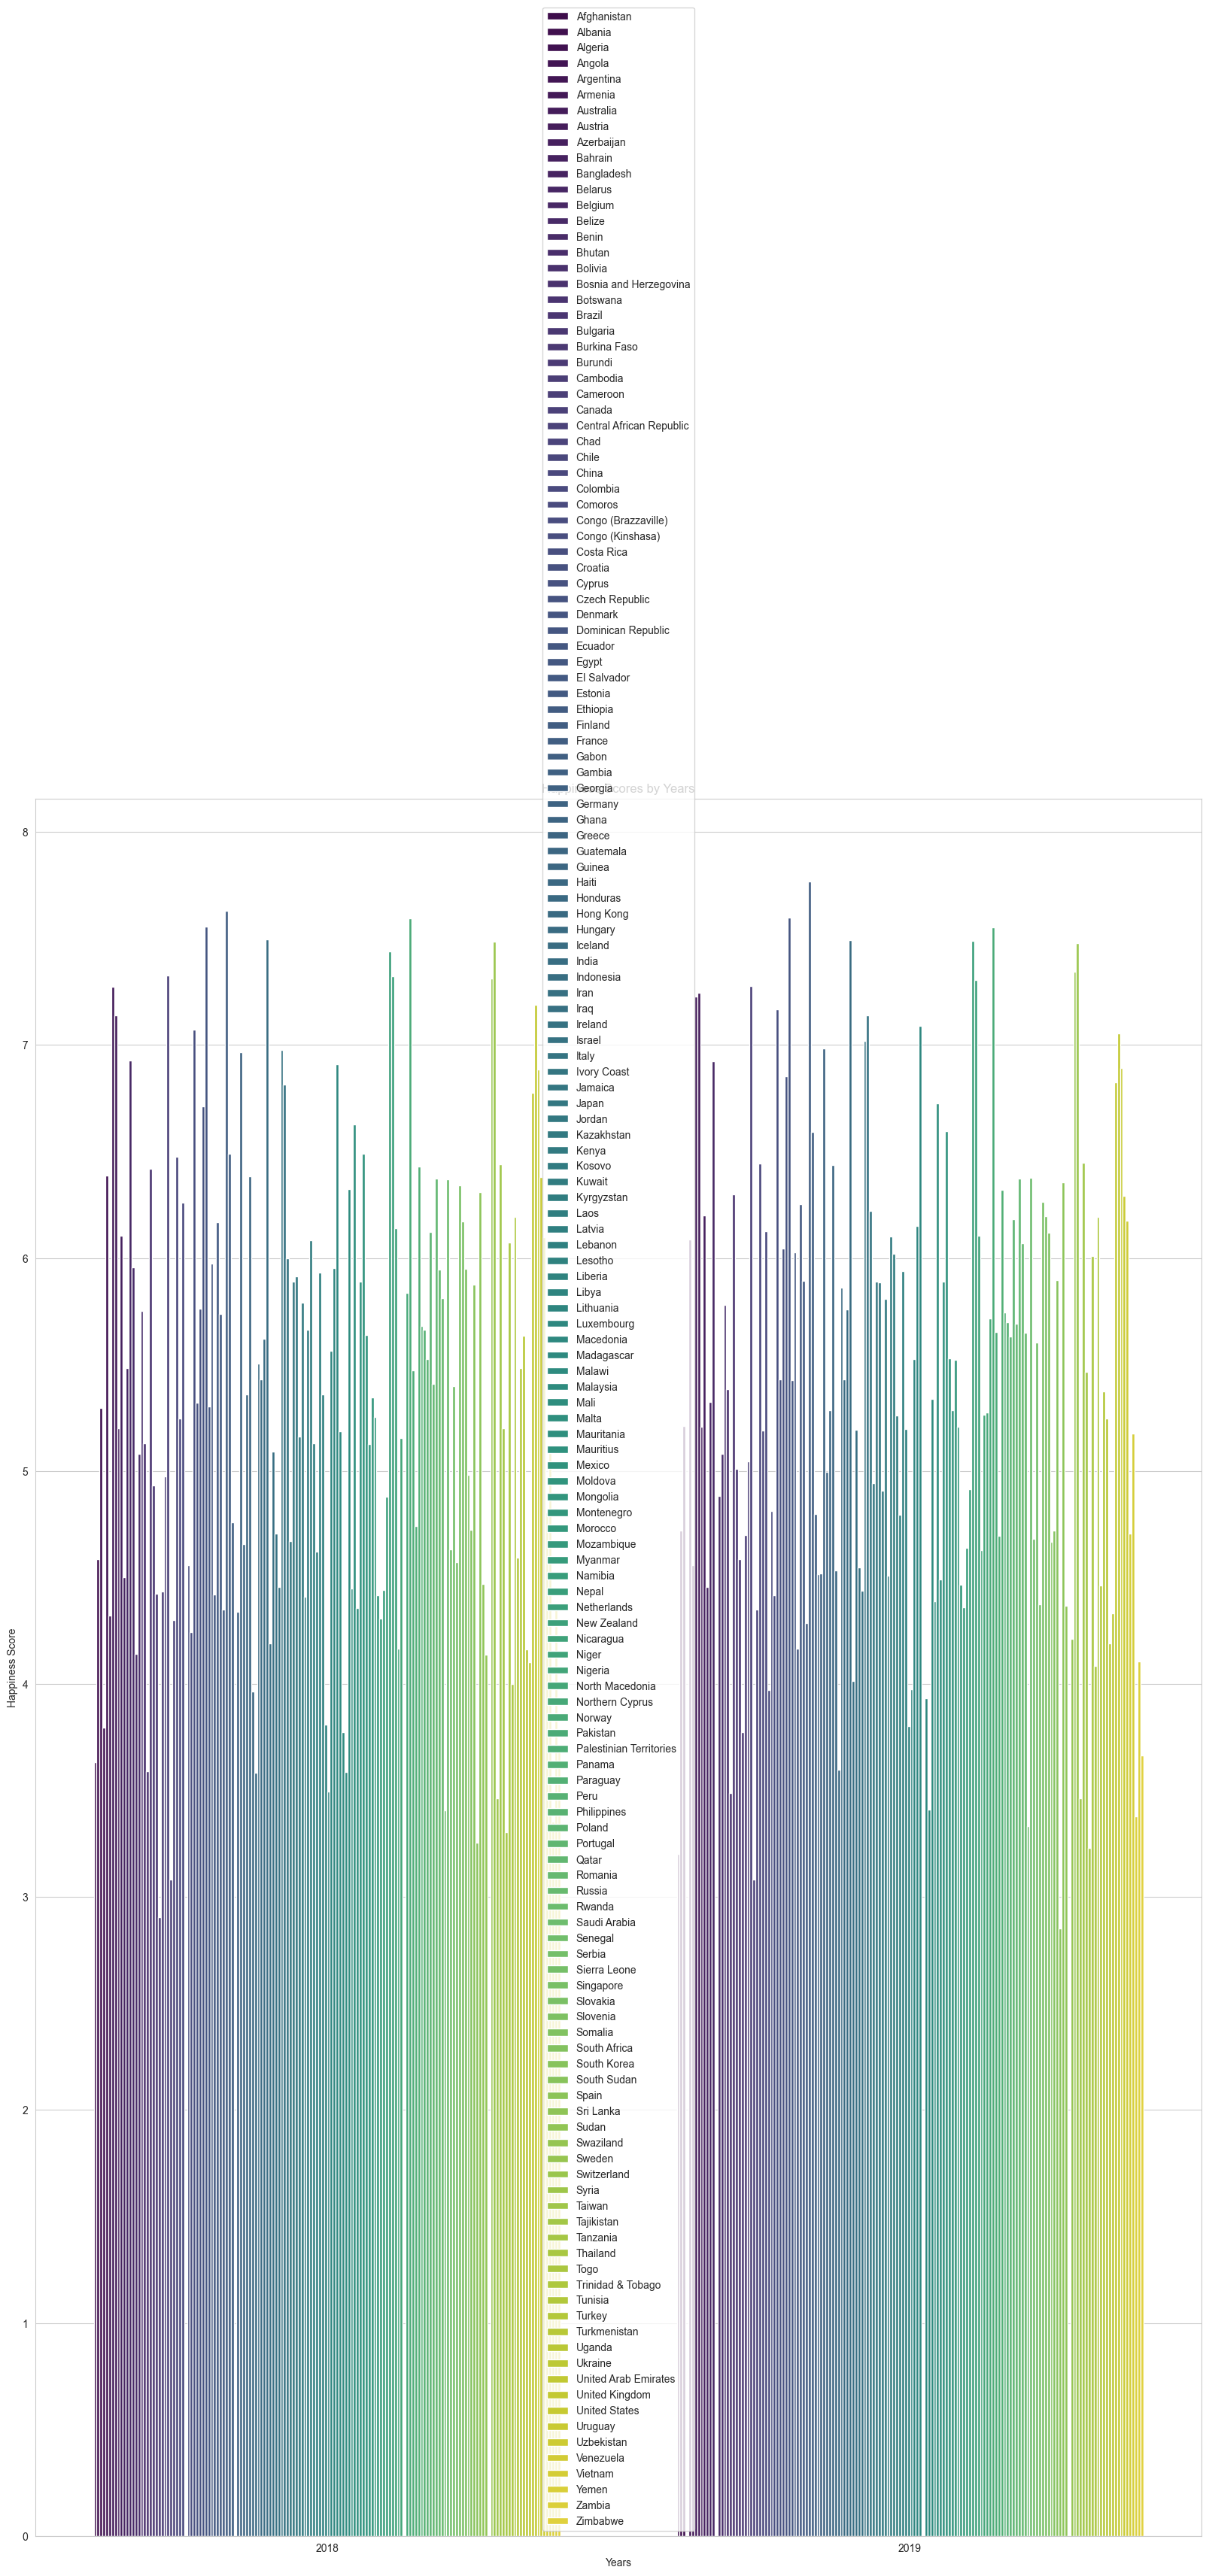

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 30))
sns.barplot(x="Year", y="Score", data=glueck_2018_2019, hue="Country or region", palette="viridis")
plt.xlabel("Years")
plt.ylabel("Happiness Score")
plt.title("Happiness Scores by Years")
plt.legend()
plt.show()


In [9]:
'''glueck_2018_.rename(columns={'GDP per capita': 'GDP_per_capita',
                                'Social support': 'Social_support',
                                'Healthy life expectancy': 'Healthy_life_expectancy',
                                'Freedom to make life choices': 'Freedom_to_make_life_choices','Perceptions of corruption':'Perceptions_of_corruption'},
                        inplace=True)'''
fig1=px.choropleth(glueck_2018_2019,
              locations="Country or region",
              color="Perceptions of corruption",
              locationmode='country names',
              color_continuous_scale='plasma')
fig1.update_layout(
    title=" Die Bewertung der Korruptionswahrnehmung in verschiedenen Ländern",
    title_x=0.5)  # Center the title
# Save the figure as a PNG image
pio.write_image(fig1, 'Korruptionswahrnehmung_by_Ländern.png')

In [10]:
import plotly.express as px
import plotly.io as pio
import kaleido

glueck_2018_2019=pd.read_csv('20230828_3.3_Datensatz_Glueck_2018-2019.csv')
glueck_2018_2019
# Create the choropleth diagram
fig = px.choropleth(glueck_2018_2019,
              locations="Country or region",
              color="Score",
              locationmode='country names',
              color_continuous_scale='plasma')
fig.update_layout(
    title="Glücklichkeitswert by Ländern",
    title_x=0.5)  # Center the title
# Save the figure as a PNG image
pio.write_image(fig, 'Glücklichkeitswert_by_Ländern.png')


In [ ]:
# Grafik 1: Barchart mit Slider
fig = px.bar(data_frame=glueck_2018,
             x='continent',
             y='pop',
             color='continent',
             animation_frame='year',
             range_y=[0, 4*10**9])

fig.show()

In [ ]:
# Grafik 2: Bubblechart mit Slider
fig = px.scatter(data_frame=gapminder,
                 x='gdpPercap',
                 y='lifeExp',
                 color='continent',
                 size='pop',
                 size_max=60,
                 hover_name='country',
                 animation_frame='year',
                 range_y=[25, 90],
                 range_x=[100, 60000],
                 log_x=True,
                 labels={'gdpPercap':'Pro-Kopf-Einkommen ($)',
                         'lifeExp':'Lebenserwartung (a)'})

fig.show()

In [19]:
glueck_2018=pd.read_csv('20230828_3.3_Datensatz_Glueck_2018.csv')
glueck_2019=pd.read_csv('20230828_3.3_Datensatz_Glueck_2019.csv')
glueck_2018_2019=pd.read_csv('20230828_3.3_Datensatz_Glueck_2018-2019.csv')
df4=pd.concat([glueck_2018,glueck_2019,glueck_2018_2019])
df4


Overall rank Country or region  Score  GDP per capita  Social support  \
0               1           Finland  7.632           1.305           1.592   
1               2            Norway  7.594           1.456           1.582   
2               3           Denmark  7.555           1.351           1.590   
3               4           Iceland  7.495           1.343           1.644   
4               5       Switzerland  7.487           1.420           1.549   
..            ...               ...    ...             ...             ...   
307           152             Yemen  3.355           0.442           1.073   
308           138            Zambia  4.107           0.578           1.058   
309           125            Zambia  4.377           0.562           1.047   
310           146          Zimbabwe  3.663           0.366           1.114   
311           144          Zimbabwe  3.692           0.357           1.094   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                      0.874                         0.681       0.202   
1                      0.861                         0.686       0.286   
2                      0.868                         0.683       0.284   
3                      0.914                         0.677       0.353   
4                      0.927                         0.660       0.256   
..                       ...                           ...         ...   
307                    0.343                         0.244       0.083   
308                    0.426                         0.431       0.247   
309                    0.295                         0.503       0.221   
310                    0.433                         0.361       0.151   
311                    0.248                         0.406       0.132   

     Perceptions of corruption    Year  
0                        0.393     NaN  
1                        0.340     NaN  
2                        0.408     NaN  
3                        0.138     NaN  
4                        0.357     NaN  
..                         ...     ...  
307                      0.064  2018.0  
308                      0.087  2019.0  
309                      0.082  2018.0  
310                      0.089  2019.0  
311                      0.099  2018.0  

[624 rows x 10 columns]

In [20]:
df4.drop_duplicates(inplace=True)#
df4

Overall rank Country or region  Score  GDP per capita  Social support  \
0               1           Finland  7.632           1.305           1.592   
1               2            Norway  7.594           1.456           1.582   
2               3           Denmark  7.555           1.351           1.590   
3               4           Iceland  7.495           1.343           1.644   
4               5       Switzerland  7.487           1.420           1.549   
..            ...               ...    ...             ...             ...   
307           152             Yemen  3.355           0.442           1.073   
308           138            Zambia  4.107           0.578           1.058   
309           125            Zambia  4.377           0.562           1.047   
310           146          Zimbabwe  3.663           0.366           1.114   
311           144          Zimbabwe  3.692           0.357           1.094   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                      0.874                         0.681       0.202   
1                      0.861                         0.686       0.286   
2                      0.868                         0.683       0.284   
3                      0.914                         0.677       0.353   
4                      0.927                         0.660       0.256   
..                       ...                           ...         ...   
307                    0.343                         0.244       0.083   
308                    0.426                         0.431       0.247   
309                    0.295                         0.503       0.221   
310                    0.433                         0.361       0.151   
311                    0.248                         0.406       0.132   

     Perceptions of corruption    Year  
0                        0.393     NaN  
1                        0.340     NaN  
2                        0.408     NaN  
3                        0.138     NaN  
4                        0.357     NaN  
..                         ...     ...  
307                      0.064  2018.0  
308                      0.087  2019.0  
309                      0.082  2018.0  
310                      0.089  2019.0  
311                      0.099  2018.0  

[624 rows x 10 columns]

In [ ]:
# explore datasets
def get_dataset_info(df):
    print('\n\n', 'dataframe - info', '-'*30)
    print('df.shape', df.shape)
    print('-'*30)
    display(df.info())
    display(df.describe())

# duplikate finden
def find_duplicate_rows(df):
    print('\n', 'dataframe duplicates?', '-'*30)
    duplicate_rows = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))
    num_duplicate_rows = duplicate_rows.duplicated(keep='first').sum()
    print(num_duplicate_rows)
    display(duplicate_rows

In [25]:
# explore datasets
def get_dataset_info(df4):
    print('\n\n', 'dataframe - info', '-'*30)
    print('df4.shape', df4.shape)
    print('-'*30)
    display(df4.info())
    display(df4.describe())

# duplikate finden
def find_duplicate_rows(df4):
    print('\n', 'dataframe duplicates?', '-'*30)
    duplicate_rows = df4[df4.duplicated(keep=False)].sort_values(by=list(df.columns))
    num_duplicate_rows = duplicate_rows.duplicated(keep='first').sum()
    print(num_duplicate_rows)
    display(duplicate_rows)

In [24]:
find_duplicate_rows(df4)
get_dataset_info(d4)


 dataframe duplicates? ------------------------------


NameError: name 'df' is not defined

In [27]:
glueck_2018_2019.describe()

Overall rank         Year       Score  GDP per capita  Social support  \
count    312.000000   312.000000  312.000000      312.000000      312.000000   
mean      78.500000  2018.500000    5.391506        0.898298        1.211026   
std       45.104737     0.500803    1.114631        0.394592        0.300310   
min        1.000000  2018.000000    2.853000        0.000000        0.000000   
25%       39.750000  2018.000000    4.514250        0.609500        1.055750   
50%       78.500000  2018.500000    5.379500        0.960000        1.265500   
75%      117.250000  2019.000000    6.176000        1.219500        1.457500   
max      156.000000  2019.000000    7.769000        2.096000        1.644000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               312.000000                    312.000000  312.000000   
mean                  0.661295                      0.423538    0.182926   
std                   0.252724                      0.156024    0.096739   
min                   0.000000                      0.000000    0.000000   
25%                   0.488250                      0.322500    0.108750   
50%                   0.699000                      0.449500    0.175500   
75%                   0.858000                      0.540250    0.245000   
max                   1.141000                      0.724000    0.598000   

       Perceptions of corruption  
count                 312.000000  
mean                    0.111526  
std                     0.095296  
min                     0.000000  
25%                     0.050000  
50%                     0.082000  
75%                     0.141250  
max                     0.457000

In [28]:
get_dataset_info(glueck_2018_2019)



 dataframe - info ------------------------------
df4.shape (312, 10)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Year                          312 non-null    int64  
 3   Score                         312 non-null    float64
 4   GDP per capita                312 non-null    float64
 5   Social support                312 non-null    float64
 6   Healthy life expectancy       312 non-null    float64
 7   Freedom to make life choices  312 non-null    float64
 8   Generosity                    312 non-null    float64
 9   Perceptions of corruption     312 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 24.5+ KB


None

Overall rank         Year       Score  GDP per capita  Social support  \
count    312.000000   312.000000  312.000000      312.000000      312.000000   
mean      78.500000  2018.500000    5.391506        0.898298        1.211026   
std       45.104737     0.500803    1.114631        0.394592        0.300310   
min        1.000000  2018.000000    2.853000        0.000000        0.000000   
25%       39.750000  2018.000000    4.514250        0.609500        1.055750   
50%       78.500000  2018.500000    5.379500        0.960000        1.265500   
75%      117.250000  2019.000000    6.176000        1.219500        1.457500   
max      156.000000  2019.000000    7.769000        2.096000        1.644000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               312.000000                    312.000000  312.000000   
mean                  0.661295                      0.423538    0.182926   
std                   0.252724                      0.156024    0.096739   
min                   0.000000                      0.000000    0.000000   
25%                   0.488250                      0.322500    0.108750   
50%                   0.699000                      0.449500    0.175500   
75%                   0.858000                      0.540250    0.245000   
max                   1.141000                      0.724000    0.598000   

       Perceptions of corruption  
count                 312.000000  
mean                    0.111526  
std                     0.095296  
min                     0.000000  
25%                     0.050000  
50%                     0.082000  
75%                     0.141250  
max                     0.457000

In [30]:
dglueck_2018=pd.read_csv('20230828_3.3_Datensatz_Glueck_2018.csv')
glueck_2019=pd.read_csv('20230828_3.3_Datensatz_Glueck_2019.csv')
glueck_2018_2019=pd.read_csv('20230828_3.3_Datensatz_Glueck_2018-2019.csv')
df3=pd.concat([glueck_2018,glueck_2019])
df3

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.632           1.305   
1               2                    Norway  7.594           1.456   
2               3                   Denmark  7.555           1.351   
3               4                   Iceland  7.495           1.343   
4               5               Switzerland  7.487           1.420   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.592                    0.874                         0.681   
1             1.582                    0.861                         0.686   
2             1.590                    0.868                         0.683   
3             1.644                    0.914                         0.677   
4             1.549                    0.927                         0.660   
..              ...                      ...                           ...   
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  
0         0.202                      0.393  
1         0.286                      0.340  
2         0.284                      0.408  
3         0.353                      0.138  
4         0.256                      0.357  
..          ...                        ...  
151       0.217                      0.411  
152       0.276                      0.147  
153       0.158                      0.025  
154       0.235                      0.035  
155       0.202                      0.091  

[312 rows x 9 columns]

In [31]:
import pandas as pd

# Assuming you've already loaded glueck_2018 and glueck_2019 DataFrames

# Concatenate the two DataFrames vertically
combined_df = pd.concat([glueck_2018, glueck_2019], ignore_index=True)

# Find the rows that are present in combined_df but not in glueck_2018 or glueck_2019
difference_df = combined_df.drop_duplicates(keep=False)

# Display the rows that are different
print(difference_df)


     Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.632           1.305   
1               2                    Norway  7.594           1.456   
2               3                   Denmark  7.555           1.351   
3               4                   Iceland  7.495           1.343   
4               5               Switzerland  7.487           1.420   
..            ...                       ...    ...             ...   
307           152                    Rwanda  3.334           0.359   
308           153                  Tanzania  3.231           0.476   
309           154               Afghanistan  3.203           0.350   
310           155  Central African Republic  3.083           0.026   
311           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.592                    0.874                         0.681   
1  

In [32]:
import pandas as pd



merged_df = pd.merge(glueck_2018, glueck_2019, on='Country or region', how='outer', indicator=True)

# Find the rows where the 'Country or region' is different between the two DataFrames
difference_df = merged_df[merged_df['_merge'] != 'both']


print(difference_df)


     Overall rank_x Country or region  Score_x  GDP per capita_x  \
48             49.0            Belize    5.956             0.807   
88             89.0         Macedonia    5.185             0.959   
136           137.0             Sudan    4.139             0.605   
141           142.0            Angola    3.795             0.730   
156             NaN   North Macedonia      NaN               NaN   
157             NaN            Gambia      NaN               NaN   
158             NaN         Swaziland      NaN               NaN   
159             NaN           Comoros      NaN               NaN   

     Social support_x  Healthy life expectancy_x  \
48              1.101                      0.474   
88              1.239                      0.691   
136             1.240                      0.312   
141             1.125                      0.269   
156               NaN                        NaN   
157               NaN                        NaN   
158               NaN  

In [38]:
# Assuming you've already loaded glueck_2018 and glueck_2019 DataFrames

# Concatenate the two DataFrames
combined_df = pd.concat([glueck_2018, glueck_2019], ignore_index=True)

# Columns of interest
columns_of_interest = ['Overall rank', 'Country or region', 'Year', 'Score', 'GDP per capita',
                       'Social support', 'Healthy life expectancy', 'Freedom to make life choices',
                       'Generosity', 'Perceptions of corruption']

# Find the indices of minimum values in each column
min_indices = combined_df[columns_of_interest].idxmin()

# Get the corresponding values from the 'Country or region' column
min_countries = combined_df.loc[min_indices, 'Country or region']

# Create a DataFrame to display the results
min_values_df = pd.DataFrame({'Column': min_indices.index, 'Minimum Value': min_indices.values, 'Country': min_countries})

# Display the DataFrame
print(min_values_df)


KeyError: "['Year'] not in index"

In [39]:
import pandas as pd

# Assuming you've already loaded the glueck_2018_2019 DataFrame

# Columns of interest
columns_of_interest = ['Overall rank', 'Country or region', 'Year', 'Score', 'GDP per capita',
                       'Social support', 'Healthy life expectancy', 'Freedom to make life choices',
                       'Generosity', 'Perceptions of corruption']

# Find the indices of minimum values in each column
min_indices = glueck_2018_2019[columns_of_interest].idxmin()

# Get the corresponding values from the 'Country or region' column
min_countries = glueck_2018_2019.loc[min_indices, 'Country or region']

# Create a DataFrame to display the results
min_values_df = pd.DataFrame({'Column': min_indices.index, 'Minimum Value': min_indices.values, 'Country': min_countries})

# Display the DataFrame
print(min_values_df)


TypeError: reduction operation 'argmin' not allowed for this dtype

# Find the minumm values and the relevant country

In [40]:
import pandas as pd



# Numeric columns of interest
numeric_columns = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                   'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Find the country with the minimum value in each numeric column
min_countries = {}
for column in numeric_columns:
    min_index = glueck_2018_2019[column].idxmin()
    min_countries[column] = glueck_2018_2019.loc[min_index, 'Country or region']

# Display the results
for column, country in min_countries.items():
    print(f"Minimum in '{column}': {glueck_2018_2019[column].min()} (Country: {country})")


Minimum in 'Score': 2.853 (Country: South Sudan)
Minimum in 'GDP per capita': 0.0 (Country: Somalia)
Minimum in 'Social support': 0.0 (Country: Central African Republic)
Minimum in 'Healthy life expectancy': 0.0 (Country: Sierra Leone)
Minimum in 'Freedom to make life choices': 0.0 (Country: Afghanistan)
Minimum in 'Generosity': 0.0 (Country: Greece)
Minimum in 'Perceptions of corruption': 0.0 (Country: Bosnia and Herzegovina)


# Find the max values and the relevant countries

In [41]:
import pandas as pd



# Numeric columns of interest
numeric_columns = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                   'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Find the country with the maximum value in each numeric column
max_countries = {}
for column in numeric_columns:
    max_index = glueck_2018_2019[column].idxmax()
    max_countries[column] = glueck_2018_2019.loc[max_index, 'Country or region']

# Display the results
for column, country in max_countries.items():
    print(f"Maximum in '{column}': {glueck_2018_2019[column].max()} (Country: {country})")


Maximum in 'Score': 7.769 (Country: Finland)
Maximum in 'GDP per capita': 2.096 (Country: United Arab Emirates)
Maximum in 'Social support': 1.644 (Country: Iceland)
Maximum in 'Healthy life expectancy': 1.141 (Country: Singapore)
Maximum in 'Freedom to make life choices': 0.724 (Country: Uzbekistan)
Maximum in 'Generosity': 0.598 (Country: Myanmar)
Maximum in 'Perceptions of corruption': 0.457 (Country: Singapore)


In [42]:
import pandas as pd

# Assuming you've already loaded the glueck_2018_2019 DataFrame

# Columns of interest
columns_of_interest = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                       'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Calculate the correlation matrix
correlation_matrix = glueck_2018_2019[columns_of_interest].corr()

# Display the correlation matrix
print(correlation_matrix)


                                 Score  GDP per capita  Social support  \
Score                         1.000000        0.797977        0.761080   
GDP per capita                0.797977        1.000000        0.713293   
Social support                0.761080        0.713293        1.000000   
Healthy life expectancy       0.755875        0.816590        0.668207   
Freedom to make life choices  0.539897        0.342953        0.420206   
Generosity                    0.106645       -0.044788       -0.014367   
Perceptions of corruption     0.396947        0.310951        0.196076   

                              Healthy life expectancy  \
Score                                        0.755875   
GDP per capita                               0.816590   
Social support                               0.668207   
Healthy life expectancy                      1.000000   
Freedom to make life choices                 0.301488   
Generosity                                   0.001476   
Percepti

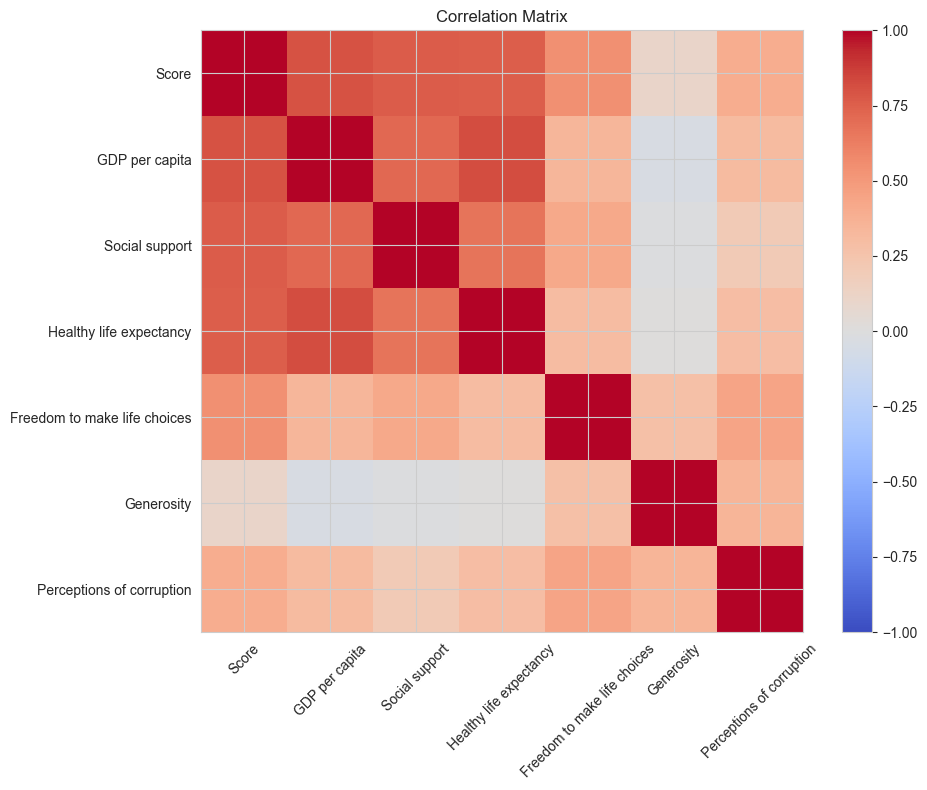

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've already loaded the glueck_2018_2019 DataFrame

# Columns of interest
columns_of_interest = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                       'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Calculate the correlation matrix
correlation_matrix = glueck_2018_2019[columns_of_interest].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix")
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(columns_of_interest)), columns_of_interest, rotation=45)
plt.yticks(range(len(columns_of_interest)), columns_of_interest)
plt.tight_layout()

# Save the plot as a PNG image
plt.savefig('correlation_matrix.png')


In [48]:
fig = px.scatter(glueck_2018_2019, x="Year", y="Score", trendline="ols")
fig.show()
mod = smf.ols(data=data, formula='Score ~ GPD_per_capita')
res = mod.fit()
print(res.summary())
print(res.params)

PatsyError: Error evaluating factor: NameError: name 'GPD_per_capita' is not defined
    Score ~ GPD_per_capita
            ^^^^^^^^^^^^^^

In [49]:
mittel = (glueck_2018_2019[glueck_2018_2019["Year"]==2018]["Score"].mean() +glueck_2018_2019[glueck_2018_2019["Year"]==2019]["Score"].mean()) / 2
mittel

5.391506410256411

In [72]:
# Grafik 2: Bubblechart mit Slider
fig = px.scatter(data_frame=glueck_2018_2019,
                 x='GDP per capita',
                 y='Social support',
                 color='Freedom to make life choices',
                 size='Score',
                 size_max=50,
                 hover_name='Country or region',
                 animation_frame='Year',
                 range_y=[0.0001, 2],
                 range_x=[0.001, 8],
                 log_x=True)

fig.show()

In [77]:
import plotly.express as px

fig = px.scatter(data_frame=glueck_2018_2019,
                 x='GDP per capita',
                 y='Social support',
                 color='Freedom to make life choices',
                 size='Score',
                 size_max=30,
                 hover_name='Country or region',
                 animation_frame='Year',
                 range_y=[0.0001, 2],
                 range_x=[0.001, 8],
                 log_x=True)


fig.update_layout(
    width=1000,
    margin=dict(l=0, r=0, t=30, b=0),
    title="Scatter Plot of Happiness Factors",
    title_x=0.5,
)

fig.show()


In [9]:
import plotly.graph_objects as go
import pandas as pd


# Select the columns of interest
columns_of_interest = ['Score', 'GDP per capita', 'Social support']
df_subset = glueck_2018_2019[columns_of_interest]

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=df_subset['Score'],
    y=df_subset['GDP per capita'],
    z=df_subset['Social support'],
    mode='markers',
    marker=dict(
        size=10,
        color=df_subset['Score'],  # Color based on the 'Score' values
        colorscale='Viridis',  # Choose a colorscale
        opacity=0.8
    )
)])

# Set plot titles and labels
fig.update_layout(scene=dict(
    xaxis_title='Score',
    yaxis_title='GDP per capita',
    zaxis_title='Social support'
))

# Show the plot
fig.show()


In [7]:
fig = px.scatter_3d(data_frame=glueck_2018_2019,
                    x='Score',
                    y='GDP per capita',
                    z='Social support',
                    color='Score',
                    )

fig.update_layout(scene=dict(
    xaxis=dict(nticks=10, range=[min(glueck_2018_2019['Score']), max(glueck_2018_2019['Score'])]),
    yaxis=dict(nticks=10, range=[min(glueck_2018_2019['GDP per capita']), max(glueck_2018_2019['GDP per capita'])]),
    zaxis=dict(nticks=10, range=[min(glueck_2018_2019['Social support']), max(glueck_2018_2019['Social support'])])
))

fig.show()



# We can graph histograms and scatter matrices of each factor, to better understand them. The x-axis represents the feature, while the y-axis shows the frequency.

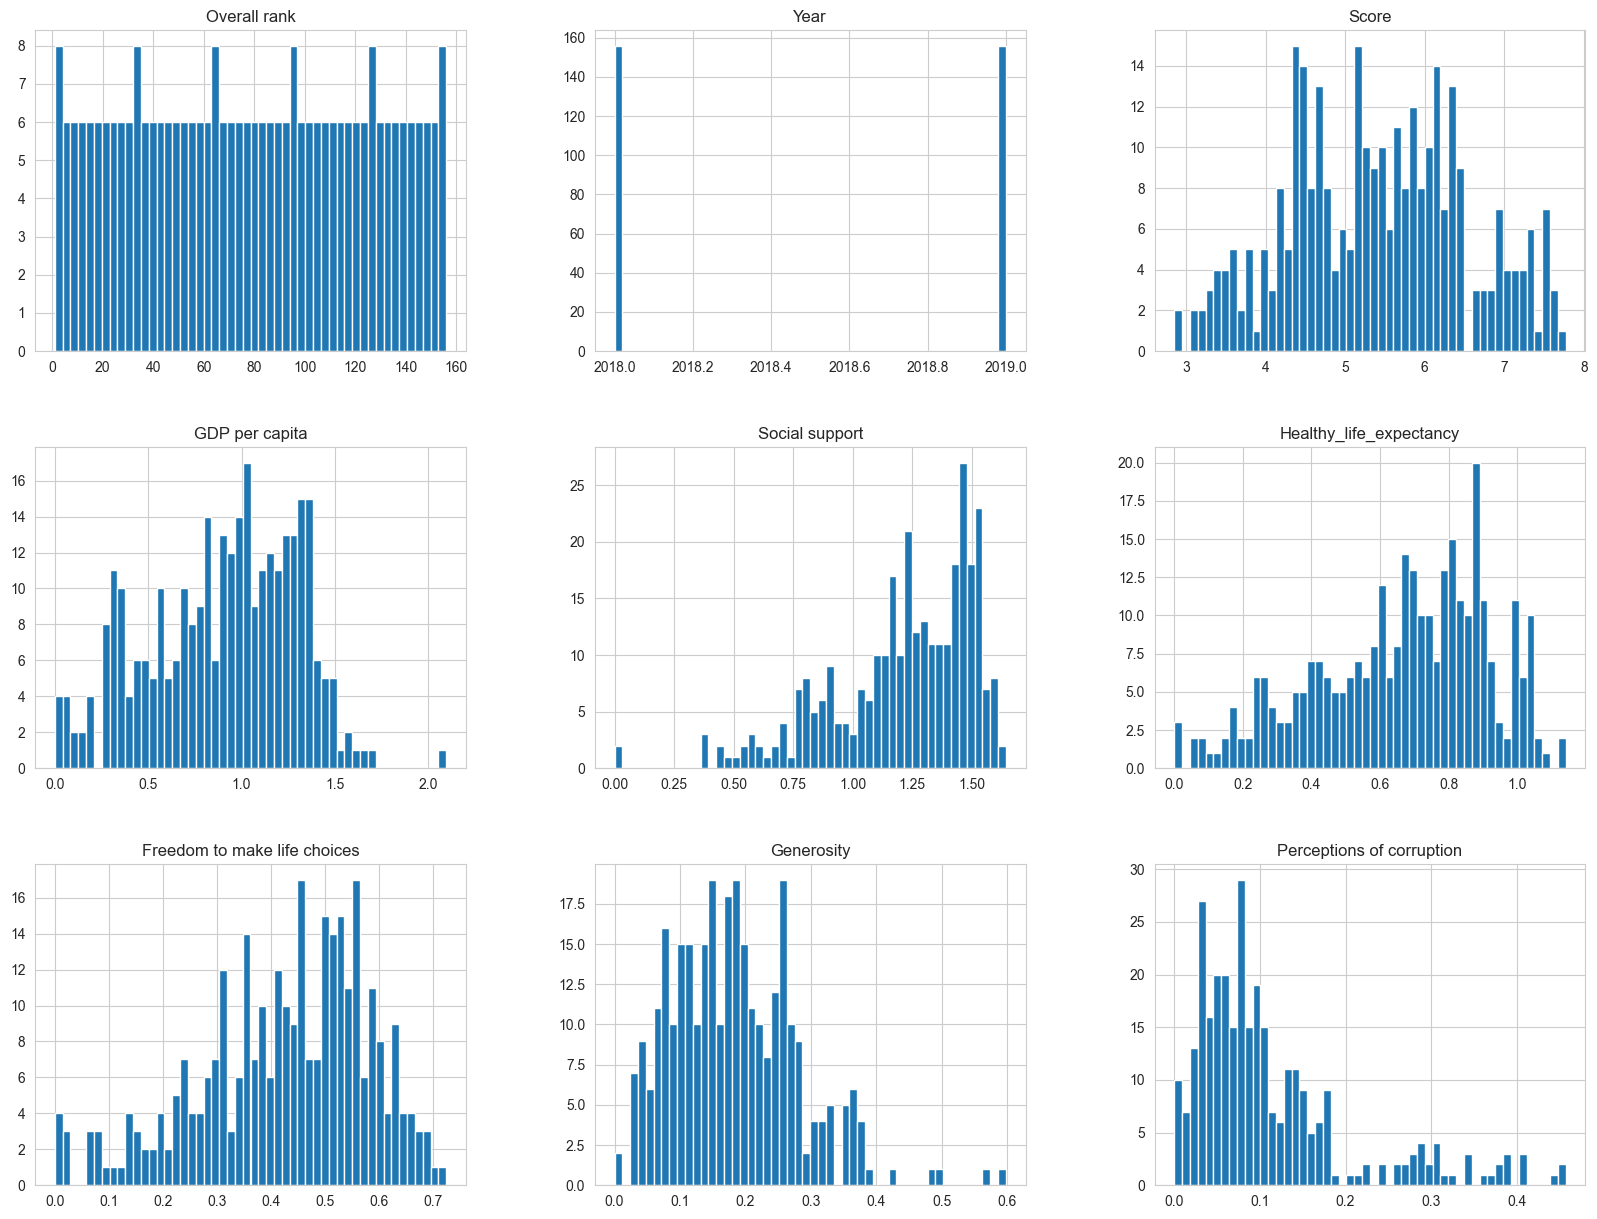

In [27]:
glueck_2018_2019.hist(bins=50, figsize=(20,15))
plt.show()

# Scatter Matrix

In [1]:
from pandas.plotting import scatter_matrix

attributes = ["GDP per capita", "Social support", "Healthy_life_expectancy",
              "Freedom to make life choices"]
scatter_matrix(glueck_2018_2019[attributes], figsize=(12, 8))
scatter_matrix()

NameError: name 'glueck_2018_2019' is not defined

# Here is a correlation chart, detailing the correlation of each factor to the happiness index ("Score"):

In [ ]:
corr_mat =glueck_2018_2019.corr()
corr_mat['Score']

In [ ]:
data_unlabeled = glu.drop("Score", axis=1)
data_unlabeled_simple = data.drop(["Score", "Generosity", "Perceptions of corruption", "Freedom to make life choices", "Country or region", "Overall rank", "Healthy life expectancy"], axis=1)

data_labels = data["Score"].copy()
data_unlabeled_simple.head()

In [ ]:
# https://www.kaggle.com/code/haiber/happiness-index-simple-lr-model/notebook

<Axes: >

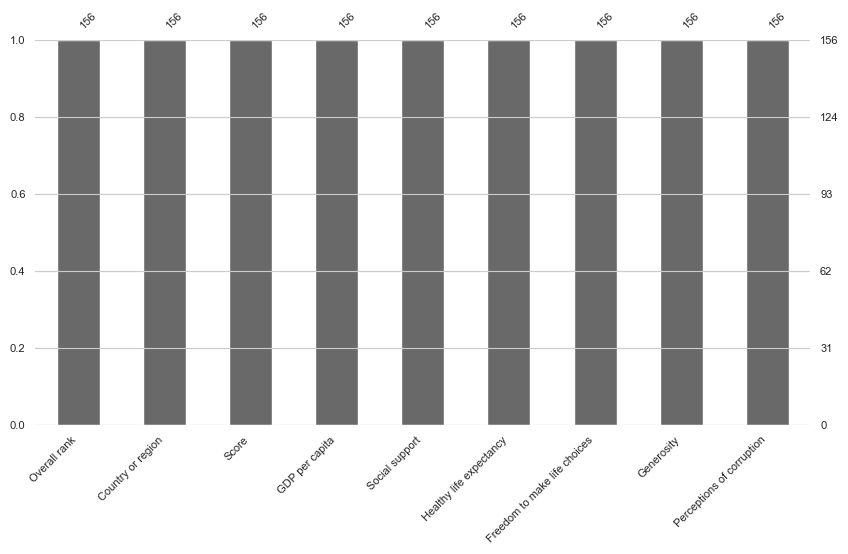

In [6]:
import missingno as msno
msno.bar(glueck_2018,figsize=(10,5),fontsize=8)

NameError: name 'glueck_2019' is not defined

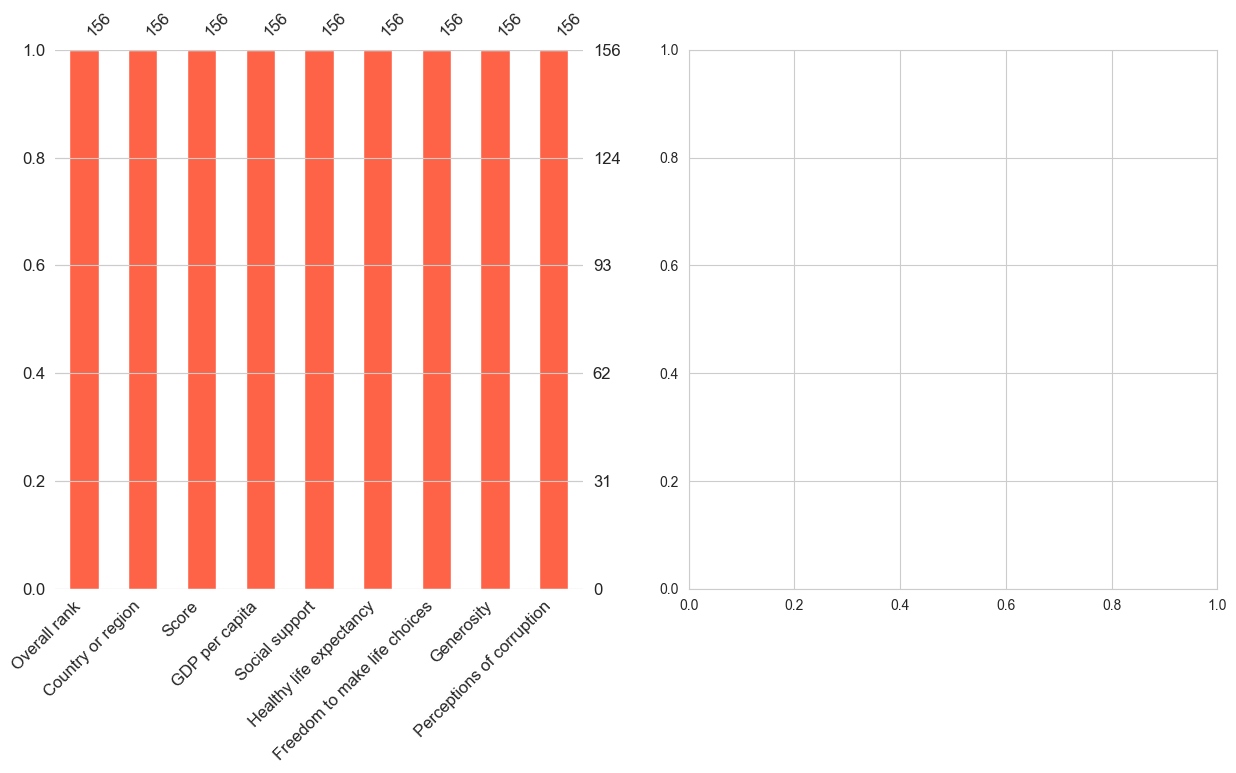

In [9]:
fig = plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(1,2,1)
msno.bar(glueck_2018, color="tomato", fontsize=12, ax=ax1);

ax2 = fig.add_subplot(1,2,2)
msno.bar(glueck_2019, log=True, color="tab:green", fontsize=12, ax=ax2);

plt.tight_layout()


ValueError: could not convert string to float: 'Afghanistan'